## Draft notebook for DSfB course, analysing a dataset of ecological data on UK plants.

### Information on the dataset
     http://ecoflora.org.uk/
     
The Ecological Flora of the British Isles is a database constructed from a wide variety of sources by Dr Helen Peat and Professor Alastair Fitter at the University of York, with financial support from the British Ecological Society and the Natural Environment Research Council. It consists of data on 3842 species of higher plants that occur in the British Isles (of which some 2000 species including all the British Natives and many common introductions have ecological traits entered), together with the bibliography of sources. This version has been produced by Dr Henry Ford.
     
The data comprises information on taxonomy (family, genus, specific name, authority, and vernacular name, together with common synonyms), a suite of over 130 ecological and morphological characteristics, vice-county distribution in Britain, European distribution by country, mycorrhizal associations, associated phytophagous insects and fungi. The data are obtained from the literature and the coverage varies greatly between species. The data set is therefore incomplete"

![alt text](Ecoflor.png)

### Importing the data into pandas
    Examining dataframe
    Finding problematic entries

##### Setting up the basic analysis environment

In [11]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

<div class = "alert alert-danger">
This is how the df was made, but saved in the github is the concatenated EcoFlora and Glopnet data.

Reading in the data

In [2]:
EcoFlora = pd.read_csv('../Data_sets/EcoFlora.txt', sep="\t", encoding='latin-1')

Checking content

In [3]:
EcoFlora.head(3)

LastName FirstName  DatasetID                                Dataset  \
0     Ford     Henry        174  Ecological Flora of the British Isles   
1     Ford     Henry        174  Ecological Flora of the British Isles   
2     Ford     Henry        174  Ecological Flora of the British Isles   

                                         SpeciesName  AccSpeciesID  \
0  Anthyllis vulneraria subsp. polyphylla (DC.) N...        203738   
1            Beta vulgaris subsp. cicla (L.) Arcang.          7314   
2              Brassica napus subsp. rapifera Metzg.          8255   

                           AccSpeciesName  ObservationID  ObsDataID  TraitID  \
0  Anthyllis vulneraria subsp. polyphylla        1345934    9604422    827.0   
1                           Beta vulgaris        1345935    9604423    827.0   
2                          Brassica napus        1345936    9604424    827.0   

                                TraitName  DataID        DataName OriglName  \
0  Species occurrence range: origin zonal     598  Species origin  nativity   
1  Species occurrence range: origin zonal     598  Species origin  nativity   
2  Species occurrence range: origin zonal     598  Species origin  nativity   

                    OrigValueStr OrigUnitStr ValueKindName OrigUncertaintyStr  \
0  Archeophyt in British Islands         NaN           NaN                NaN   
1  Archeophyt in British Islands         NaN           NaN                NaN   
2  Archeophyt in British Islands         NaN           NaN                NaN   

  UncertaintyName  Replicates  StdValue UnitName  RelUncertaintyPercent  \
0             NaN         NaN       NaN      NaN                    NaN   
1             NaN         NaN       NaN      NaN                    NaN   
2             NaN         NaN       NaN      NaN                    NaN   

   OrigObsDataID  ErrorRisk  \
0            NaN        NaN   
1            NaN        NaN   
2            NaN        NaN   

                                           Reference Comment  Unnamed: 27  
0  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN  
1  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN  
2  Fitter, A. H. and H. J. Peat 1994. The Ecologi...     NaN          NaN

What kind of things are in the columns?

In [4]:
EcoFlora.columns

Index(['LastName', 'FirstName', 'DatasetID', 'Dataset', 'SpeciesName',
       'AccSpeciesID', 'AccSpeciesName', 'ObservationID', 'ObsDataID',
       'TraitID', 'TraitName', 'DataID', 'DataName', 'OriglName',
       'OrigValueStr', 'OrigUnitStr', 'ValueKindName', 'OrigUncertaintyStr',
       'UncertaintyName', 'Replicates', 'StdValue', 'UnitName',
       'RelUncertaintyPercent', 'OrigObsDataID', 'ErrorRisk', 'Reference',
       'Comment', 'Unnamed: 27'],
      dtype='object')

This is standard database format for TRY - the trais measured are listed in DataName and teh value in OrigValueStr, the units of measure in OrigUnitStr.  
What kind of data types are the columns?  

In [5]:
EcoFlora.dtypes

LastName                  object
FirstName                 object
DatasetID                  int64
Dataset                   object
SpeciesName               object
AccSpeciesID               int64
AccSpeciesName            object
ObservationID              int64
ObsDataID                  int64
TraitID                  float64
TraitName                 object
DataID                     int64
DataName                  object
OriglName                 object
OrigValueStr              object
OrigUnitStr               object
ValueKindName             object
OrigUncertaintyStr        object
UncertaintyName           object
Replicates               float64
StdValue                 float64
UnitName                  object
RelUncertaintyPercent    float64
OrigObsDataID            float64
ErrorRisk                float64
Reference                 object
Comment                   object
Unnamed: 27              float64
dtype: object

Mixture of floats and objects.  
What data is there?

In [6]:
EcoFlora.iloc[1]

LastName                                                              Ford
FirstName                                                            Henry
DatasetID                                                              174
Dataset                              Ecological Flora of the British Isles
SpeciesName                        Beta vulgaris subsp. cicla (L.) Arcang.
AccSpeciesID                                                          7314
AccSpeciesName                                               Beta vulgaris
ObservationID                                                      1345935
ObsDataID                                                          9604423
TraitID                                                                827
TraitName                           Species occurrence range: origin zonal
DataID                                                                 598
DataName                                                    Species origin
OriglName                

What's it saying there about beetroot?
This is a single entry with information on the Species occurrence, saying it's an Archeophyt in British Islands.

How much data for each trait is there?  
Count the number of occurances of each trait  in teh TraitName column  

In [7]:
EcoFlora['TraitName'].value_counts()

Species occurrence range characteristics                                                                        35891
Leaf shape                                                                                                      12471
Plant reproductive phenology timing                                                                              9911
Species tolerance to shade                                                                                       8848
Plant height vegetative                                                                                          5511
Flower sexual syndrome (dichogamy, cleistogamy, dioecious, monoecious)                                           5418
Plant life form (Raunkiaer life form)                                                                            5111
Plant nutrition mode (heterotrophy)                                                                              4912
Plant defence mechanisms: physical                      

Wide range - all have Species occurrence range characteristics (whatever these are), very few have infomation on Bud physical defence and root hairs.

### Merging data - adding physiological data
We will add in more trait data from the global leaf traits database (https://www.try-db.org/TryWeb/Home.php)



In [5]:
leaf_df = pd.read_csv('../Data_sets/Global_leaf_traits.txt', sep="\t",encoding='latin-1')

/Users/catherine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
leaf_df.shape

(10932410, 28)

BIG dataset!

Which species from the physiology dataframe are in Ecoflora?

In [6]:
in_both = leaf_df.loc[leaf_df['AccSpeciesName'].isin(EcoFlora['AccSpeciesName'])]

In [62]:
in_both.shape

(2867466, 28)

How many species is this?

In [66]:
len(in_both['AccSpeciesName'].unique())

1394

Add this data in.

In [7]:
UKFlora = pd.concat([EcoFlora, in_both])

Lots of infomation, but database unweildly.

Pickle this it save having to rebuild it

In [ ]:
UKFlora.to_pickle("./UKFlora.pkl")

To restore:

In [15]:
UKFlora = pd.read_pickle("../Notebooks/UKFlora.pkl")

In [16]:
UKFlora.to_csv(r"./UKFlora.csv")

In [19]:
UKFlora = pd.read_csv('UKFlora.csv', sep=",",encoding='latin-1')

/Users/catherine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Which columns are informative?  
Don't need the First 4 on the dataset:
0    LastName    
1    FirstName
2    DatasetID
3    Dataset



In [20]:
UKFlora.tail(3)

Unnamed: 0    LastName FirstName  DatasetID                 Dataset  \
3234840    10930814  Sheremetev     Serge        412  The Global Leaf Traits   
3234841    10930815  Sheremetev     Serge        412  The Global Leaf Traits   
3234842    10930816  Sheremetev     Serge        412  The Global Leaf Traits   

                             SpeciesName  AccSpeciesID   AccSpeciesName  \
3234840  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   
3234841  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   
3234842  Kochia densiflora (Moq.) Aellen          6962  Bassia scoparia   

         ObservationID  ObsDataID  TraitID  \
3234840        3166824   40704005     48.0   
3234841        3166824   40704000    224.0   
3234842        3166824   40704003     46.0   

                                                 TraitName  DataID  \
3234840  Leaf density (leaf tissue density, leaf dry ma...      55   
3234841          Species genotype: chromosome cDNA content     603   
3234842                                     Leaf thickness      53   

                        DataName OriglName OrigValueStr    OrigUnitStr  \
3234840      Leaf tissue density       LTD          150         mg/cm3   
3234841  Chromosome cDNA content   2C (pg)         2.24  pg/2C-Nucleus   
3234842           Leaf thickness    LT, mm        0.421             mm   

        ValueKindName OrigUncertaintyStr UncertaintyName Replicates  StdValue  \
3234840        Single                NaN             NaN        NaN     0.150   
3234841        Single                NaN             NaN        NaN     2.240   
3234842        Single                NaN             NaN          9     0.421   

        UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk Reference  \
3234840    g/cm3                    NaN            NaN   1.918510    unpub.   
3234841       pg                    NaN            NaN   0.689187    unpub.   
3234842       mm                    NaN            NaN   2.193600    unpub.   

                             Comment  Unnamed: 27  
3234840  Leaf tissue density, mg/cm3          NaN  
3234841                          NaN          NaN  
3234842           Leaf thickness, mm          NaN

Do I have empty columns?

In [21]:
UKFlora.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234843 entries, 0 to 3234842
Data columns (total 29 columns):
Unnamed: 0               3234843 non-null int64
LastName                 3234843 non-null object
FirstName                3234843 non-null object
DatasetID                3234843 non-null int64
Dataset                  3234843 non-null object
SpeciesName              3234843 non-null object
AccSpeciesID             3234843 non-null int64
AccSpeciesName           3234843 non-null object
ObservationID            3234843 non-null int64
ObsDataID                3234843 non-null int64
TraitID                  508792 non-null float64
TraitName                508792 non-null object
DataID                   3234843 non-null int64
DataName                 3234843 non-null object
OriglName                3226036 non-null object
OrigValueStr             3218374 non-null object
OrigUnitStr              2018757 non-null object
ValueKindName            219060 non-null object
OrigUncertain

No - all have something to say.  
What does this dataset say about Daffodils?

In [22]:
daffs = UKFlora[UKFlora['AccSpeciesName']=='Narcissus pseudonarcissus']

In [23]:
daffs

Unnamed: 0    LastName FirstName  DatasetID  \
54              54        Ford     Henry        174   
662            662        Ford     Henry        174   
2937          2937        Ford     Henry        174   
156986      156986        Ford     Henry        174   
156987      156987        Ford     Henry        174   
156988      156988        Ford     Henry        174   
156989      156989        Ford     Henry        174   
156990      156990        Ford     Henry        174   
156991      156991        Ford     Henry        174   
156992      156992        Ford     Henry        174   
156993      156993        Ford     Henry        174   
156994      156994        Ford     Henry        174   
156995      156995        Ford     Henry        174   
156996      156996        Ford     Henry        174   
156997      156997        Ford     Henry        174   
156998      156998        Ford     Henry        174   
156999      156999        Ford     Henry        174   
157000      157000        Ford     Henry        174   
157001      157001        Ford     Henry        174   
157002      157002        Ford     Henry        174   
157003      157003        Ford     Henry        174   
157004      157004        Ford     Henry        174   
157005      157005        Ford     Henry        174   
157006      157006        Ford     Henry        174   
157007      157007        Ford     Henry        174   
157008      157008        Ford     Henry        174   
157009      157009        Ford     Henry        174   
157010      157010        Ford     Henry        174   
157011      157011        Ford     Henry        174   
157012      157012        Ford     Henry        174   
157013      157013        Ford     Henry        174   
157014      157014        Ford     Henry        174   
157015      157015        Ford     Henry        174   
157016      157016        Ford     Henry        174   
157017      157017        Ford     Henry        174   
157018      157018        Ford     Henry        174   
157019      157019        Ford     Henry        174   
157020      157020        Ford     Henry        174   
157021      157021        Ford     Henry        174   
157022      157022        Ford     Henry        174   
157023      157023        Ford     Henry        174   
157024      157024        Ford     Henry        174   
157025      157025        Ford     Henry        174   
157026      157026        Ford     Henry        174   
157027      157027        Ford     Henry        174   
157028      157028        Ford     Henry        174   
157029      157029        Ford     Henry        174   
157030      157030        Ford     Henry        174   
157031      157031        Ford     Henry        174   
157032      157032        Ford     Henry        174   
157033      157033        Ford     Henry        174   
157034      157034        Ford     Henry        174   
157035      157035        Ford     Henry        174   
157036      157036        Ford     Henry        174   
157037      157037        Ford     Henry        174   
157038      157038        Ford     Henry        174   
157039      157039        Ford     Henry        174   
157040      157040        Ford     Henry        174   
157041      157041        Ford     Henry        174   
157042      157042        Ford     Henry        174   
157043      157043        Ford     Henry        174   
157044      157044        Ford     Henry        174   
157045      157045        Ford     Henry        174   
157046      157046        Ford     Henry        174   
157047      157047        Ford     Henry        174   
157048      157048        Ford     Henry        174   
157049      157049        Ford     Henry        174   
157050      157050        Ford     Henry        174   
157051      157051        Ford     Henry        174   
157052      157052        Ford     Henry        174   
157053      157053        Ford     Henry        174   
157054      157054        Ford     Henry        

It's listed as an archeophyte (part of the UK"s original flora) and a Neophyte (introduced since humans).  It grows on infertile slow draining, moist soil of pH 4 - 7.8.  It can manage in deep, light or mid shade and grows from sea level up to 274m.  It's usually common where it is found and numbers are increasing.  It's a European native found in 7 countries, part of the southern temperate biome with a suboceanic eastern limit, reaching North to 55-60 latitude.  It's found in regions with an average January temp of 3.7'C and July tmep of 15.6'C and 920mm of rain annually. Average conditioan also include 11320 KJm2 per day of solar radiation, 0.84kPa warer vapour pressure and 2.8 m/s wind.

It's non woody and self supporting, usually to 40cm tall with little spread.  Leaves are simple, entire and pointed, more than 3x longer than wide and without petioles. they are 10-100 cm2 with stomata on both surfaces - 68 per mm2 on the lower side, 65 per mm2 on the upper side.  Leaves are produced inthe spring and last for 2-6 months.  The roots are adventitious - emerging from the hypocotl and grow down up to 10 cm.  Photosyntheisis is via the C3 pathway.  They are frost resistant.  Shoots last less than one year and it takes 2-5 years for a plant to flower, but can be up to 20 (!).  The plants flower multiple times and have bulbs which spread clonally in patches and flower in March and April.  Pollen grains are 63um diameter and are transfered by insects between the hermaphrodite flowers.  An average of 89 seeds of 3mm diameter are dispersed from each flower in summer by the wind, to germinate in autumn/winter.  The seeds can last for 3-12 months in the soil seed bank. 

They have usually have arbuscular microrhiza
They have 14 (or 18) chromosomes and are diploid. 2c is 30pg. Leaves are 43% by weight Nitrogen adn have a specific leaf area of 192.93cm2/g

##### Several DataName entries for some traits for this species - some contradictory

### Grouping  
How many types of data are there?  
Can we re-arrange into one colum per data type?  
   

In [24]:
len(UKFlora['DataName'].unique())

261

In [25]:
UKFlora['DataName'].unique()

array(['Species origin', 'Species nutrient requirements (in soil)',
       'Reference / source', 'Tolerance to shade',
       'Species status (nativity at growth location)',
       'Range: 3. continents where native', 'Stem self-supporting',
       'Plant height (unspecified if vegetative or reproductive)',
       'Leaf compoundness', 'Plant photosynthetic pathway', 'Carnivory',
       'Nutrition (autotroph versus heterotroph)',
       'Dicliny (monoeceous, dioecious, hermaphrodite)',
       'Species soil moisture requirements (drainage)',
       'Species pH requirement (soil, extreme maximum)',
       'Species pH requirement ( soil, extreme minimum)',
       'Altitude (minimum recorded)', 'First historical record: 1. date',
       'First historical record: 2. site',
       'Range: 4. continents where introduced', 'SN Index', 'EW Index',
       'Woodiness',
       'Spread (plant height versus plant width relationshp))',
       'Leaf shape: 2. outline', 'Leaf shape: 3. pointed/round',
 

Many of the traits are categorical.  
Can I list which are quantitative?  
Only once sorted in a column of their own  

In [64]:
minimal = UKFlora[['AccSpeciesName', 'DataName', 'OrigValueStr']].drop_duplicates()

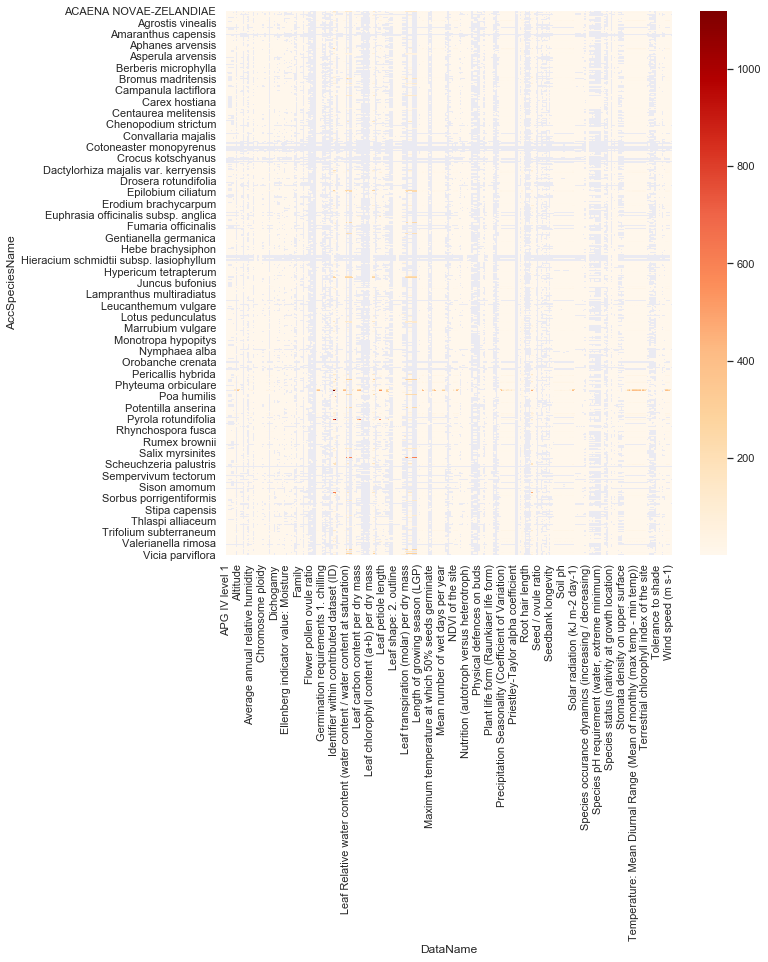

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(
    minimal.groupby(['AccSpeciesName', 'DataName'])['OrigValueStr'].size().unstack(),
    cmap = 'OrRd'
)

A few species with little data and many traits with data from few species

In [66]:
minimal[
    (minimal['DataName'] == 'APG IV level 1')
    & (minimal['AccSpeciesName'] == 'ALISMA PLANTAGO-AQUATICA')
]

AccSpeciesName        DataName OrigValueStr
3006295  ALISMA PLANTAGO-AQUATICA  APG IV level 1     Monocots

In [67]:
minimal.dtypes#.groupby(['AccSpeciesName', 'DataName'])['OrigValueStr']

AccSpeciesName    object
DataName          object
OrigValueStr      object
dtype: object

### Switching to wide format

How many duplicates do I have, with the same AccSpeciesName and DataName?

In [68]:
len(minimal['AccSpeciesName']) - len(minimal.drop_duplicates(subset=['AccSpeciesName', 'DataName']))

444049

MANY entries of same data for same species.  Would be foolish to summarize by species, better to keep as a group ID.  
BUT would like columns of data names, rows of individuals with infomation.  Sample name not species name.  
Multi-index pivot table with ObservationID and AccSpeciesName as index, DataName as columns and OrigValueStr as the values.  
'aggfunc=lambda x: x' means it will not try and average descriptions of leaf shape, but just copy the value across without processing

In [70]:
By_obs = pd.pivot_table(UKFlora, index=['AccSpeciesName','ObservationID'], columns='DataName', values='OrigValueStr', aggfunc=lambda x: x)

Index should not be species - re set

In [71]:
By_obs = By_obs.reset_index()

In [72]:
By_obs.head(10)

DataName          AccSpeciesName  ObservationID APG IV level 1 APG IV level 2  \
0         ACAENA NOVAE-ZELANDIAE        1349853            NaN            NaN   
1         ACAENA NOVAE-ZELANDIAE        1454149            NaN            NaN   
2         ACAENA NOVAE-ZELANDIAE        1454150            NaN            NaN   
3         ACAENA NOVAE-ZELANDIAE        1454151            NaN            NaN   
4         ACAENA NOVAE-ZELANDIAE        1454152            NaN            NaN   
5         ACAENA NOVAE-ZELANDIAE        1454153            NaN            NaN   
6         ACAENA NOVAE-ZELANDIAE        1454154            NaN            NaN   
7         ACAENA NOVAE-ZELANDIAE        1454155            NaN            NaN   
8         ACAENA NOVAE-ZELANDIAE        1454156            NaN            NaN   
9         ACAENA NOVAE-ZELANDIAE        1454157            NaN            NaN   

DataName APG IV level 3 APG IV level 4 APG IV level 5  \
0                   NaN            NaN            NaN   
1                   NaN            NaN            NaN   
2                   NaN            NaN            NaN   
3                   NaN            NaN            NaN   
4                   NaN            NaN            NaN   
5                   NaN            NaN            NaN   
6                   NaN            NaN            NaN   
7                   NaN            NaN            NaN   
8                   NaN            NaN            NaN   
9                   NaN            NaN            NaN   

DataName Actual EvapoTranspiration After-ripening requirement Altitude  \
0                              NaN                        NaN      NaN   
1                              NaN                        NaN      NaN   
2                              NaN                        NaN      NaN   
3                              NaN                        NaN      NaN   
4                              NaN                        NaN      NaN   
5                              NaN                        NaN      NaN   
6                              NaN                        NaN      NaN   
7                              NaN                        NaN      NaN   
8                              NaN                        NaN      NaN   
9                              NaN                        NaN      NaN   

DataName Altitude (maximum recorded) Altitude (minimum recorded)  \
0                                NaN                         NaN   
1                                NaN                         NaN   
2                                NaN                         NaN   
3                                NaN                         NaN   
4                                NaN                         NaN   
5                                NaN                         NaN   
6                                NaN                           0   
7                                NaN                         NaN   
8                                NaN                         NaN   
9                                NaN                         NaN   

DataName Altitude (typical minimum) Annual precipitation  \
0                               NaN                  NaN   
1                               NaN                  NaN   
2                               NaN                  NaN   
3                               NaN                  NaN   
4                               NaN                  NaN   
5                               NaN                  NaN   
6                               NaN                  NaN   
7                               NaN                  NaN   
8                               NaN                  NaN   
9                               NaN                  NaN   

DataName Annual seed dispersal Appendages on dispersal unit  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3  

LOTS of NaNs!  Lots of ACAENA NOVAE-ZELANDIAE - commonly known as red bidibid, bidgee widgee, buzzy and piri-piri bur, is a small herbaceous, prostrate perennial, native to New Zealand, Australia and New Guinea, of the family Rosaceae.  it is regarded as invasive in Great Britain where it has established itself in places such as dune habitats on Lindisfarne

What does this dataframe have to say about beetroot?

In [34]:
Beetroot = By_obs[By_obs['AccSpeciesName'].str.match('Beta vulgaris')]

In [35]:
Beetroot.shape

(80, 257)

80 entries for Beetroot!  Most will be Nans.

In [36]:
Beetroot

DataName AccSpeciesName  ObservationID APG IV level 1 APG IV level 2  \
19255     Beta vulgaris        1345935            NaN            NaN   
19256     Beta vulgaris        1346683            NaN            NaN   
19257     Beta vulgaris        1348237            NaN            NaN   
19258     Beta vulgaris        1350012            NaN            NaN   
19259     Beta vulgaris        1466484            NaN            NaN   
19260     Beta vulgaris        1466485            NaN            NaN   
19261     Beta vulgaris        1466486            NaN            NaN   
19262     Beta vulgaris        1466487            NaN            NaN   
19263     Beta vulgaris        1466488            NaN            NaN   
19264     Beta vulgaris        1466489            NaN            NaN   
19265     Beta vulgaris        1466490            NaN            NaN   
19266     Beta vulgaris        1466491            NaN            NaN   
19267     Beta vulgaris        1466492            NaN            NaN   
19268     Beta vulgaris        1466493            NaN            NaN   
19269     Beta vulgaris        1466494            NaN            NaN   
19270     Beta vulgaris        1466495            NaN            NaN   
19271     Beta vulgaris        1466496            NaN            NaN   
19272     Beta vulgaris        1466497            NaN            NaN   
19273     Beta vulgaris        1466498            NaN            NaN   
19274     Beta vulgaris        1466499            NaN            NaN   
19275     Beta vulgaris        1466500            NaN            NaN   
19276     Beta vulgaris        1466501            NaN            NaN   
19277     Beta vulgaris        1466502            NaN            NaN   
19278     Beta vulgaris        1466503            NaN            NaN   
19279     Beta vulgaris        1466504            NaN            NaN   
19280     Beta vulgaris        1466505            NaN            NaN   
19281     Beta vulgaris        1466506            NaN            NaN   
19282     Beta vulgaris        1466507            NaN            NaN   
19283     Beta vulgaris        1466508            NaN            NaN   
19284     Beta vulgaris        1466509            NaN            NaN   
19285     Beta vulgaris        1466510            NaN            NaN   
19286     Beta vulgaris        1466511            NaN            NaN   
19287     Beta vulgaris        1466512            NaN            NaN   
19288     Beta vulgaris        1466513            NaN            NaN   
19289     Beta vulgaris        1466514            NaN            NaN   
19290     Beta vulgaris        1466515            NaN            NaN   
19291     Beta vulgaris        1466516            NaN            NaN   
19292     Beta vulgaris        1466517            NaN            NaN   
19293     Beta vulgaris        1466518            NaN            NaN   
19294     Beta vulgaris        1466519            NaN            NaN   
19295     Beta vulgaris        1466520            NaN            NaN   
19296     Beta vulgaris        1466521            NaN            NaN   
19297     Beta vulgaris        1466522            NaN            NaN   
19298     Beta vulgaris        1466523            NaN            NaN   
19299     Beta vulgaris        1466524            NaN            NaN   
19300     Beta vulgaris        1466525            NaN            NaN   
19301     Beta vulgaris        1466526            NaN            NaN   
19302     Beta vulgaris        1466527            NaN            NaN   
19303     Beta vulgaris        1466528            NaN            NaN   
19304     Beta vulgaris        1466529            NaN            NaN   
19305     Beta vulgaris        1466530            NaN            NaN   
19306     Beta vulgaris        1466531            NaN            NaN   
19307     Beta vulgaris        1466532            NaN            NaN   
19308     Beta vulgaris        1466533            NaN            NaN   
19309     Beta vulgaris        1466534  

What do I actually have data for?  
Two Glopnet entries (data from Spain)  
The rest mostly NaNs for any one observation.  
Can I aggregate?  How many non-NaNs for each column?  

In [37]:
Beetroot.dtypes

DataName
AccSpeciesName                                                                                                                                    object
ObservationID                                                                                                                                      int64
APG IV level 1                                                                                                                                    object
APG IV level 2                                                                                                                                    object
APG IV level 3                                                                                                                                    object
APG IV level 4                                                                                                                                    object
APG IV level 5                                                           

All objects!  Need to make numeric if can.  

In [38]:
Beetroot = Beetroot.apply(pd.to_numeric, errors ='ignore')

In [39]:
Beetroot.dtypes

DataName
AccSpeciesName                                                                                                                                     object
ObservationID                                                                                                                                       int64
APG IV level 1                                                                                                                                     object
APG IV level 2                                                                                                                                     object
APG IV level 3                                                                                                                                     object
APG IV level 4                                                                                                                                    float64
APG IV level 5                                                     

Missing data. Most obs have dat for only one column

In [40]:
Beetroot.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 19255 to 19334
Columns: 257 entries, AccSpeciesName to Woodiness
dtypes: float64(198), int64(1), object(58)
memory usage: 161.2+ KB


In [41]:
Beetroot.count()

DataName
AccSpeciesName                                                                                                                                    80
ObservationID                                                                                                                                     80
APG IV level 1                                                                                                                                     2
APG IV level 2                                                                                                                                     2
APG IV level 3                                                                                                                                     2
APG IV level 4                                                                                                                                     0
APG IV level 5                                                                                   

Most columns with infomation have values for 1 - 3 observations.     
Is this low desity of data typical for all species?  
How can I tidy this up and aggregate where possible?  

Group by species and count number of obs

In [42]:
count_samples = By_obs.groupby('AccSpeciesName', as_index=False)['ObservationID'].count()

In [43]:
count_samples.columns = ['AccSpeciesName', 'Obs_count']

In [44]:
count_samples.head(3)

AccSpeciesName  Obs_count
0       ACAENA NOVAE-ZELANDIAE         89
1  ACAENA NOVAE-ZELANDIAE Kirk          1
2    ADIANTUM CAPILLUS-VENERIS         65

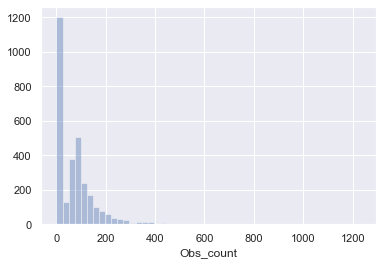

In [32]:
sns.distplot(count_samples['Obs_count'], kde=False);

In [45]:
count_samples.describe()

Obs_count
count  3031.000000
mean     75.483339
std      97.639701
min       1.000000
25%       1.000000
50%      67.000000
75%     104.000000
max    1233.000000

LOTS of varation in how many obs have data.  
NEED TO SORT THIS  
For the moment aggregate by species 

#### Rather than just count obs I want to count NaNs per column by species.

## Agregating by species  
<div class="alert alert-block alert-warning">
concatenating string data, averaging numeric data.  
Write a funciton to check if the coumn is float or string and average floats, concatenate string (or take first value for string?)

In [58]:
minimal = UKFlora[['AccSpeciesName', 'DataName', 'OrigValueStr']].drop_duplicates()

This gives a single line for each case where the Species_data_value is unique

In [59]:
minimal.head(3)

AccSpeciesName        DataName  \
0  Anthyllis vulneraria subsp. polyphylla  Species origin   
1                           Beta vulgaris  Species origin   
2                          Brassica napus  Species origin   

                    OrigValueStr  
0  Archeophyt in British Islands  
1  Archeophyt in British Islands  
2  Archeophyt in British Islands

In [60]:
minimal.shape

(668189, 3)

In [61]:
wide_minimal = pd.pivot_table(minimal, index='AccSpeciesName', columns='DataName', values='OrigValueStr', aggfunc=lambda x: (x))

In [62]:
wide_minimal.head(5)

DataName                    APG IV level 1 APG IV level 2 APG IV level 3  \
AccSpeciesName                                                             
ACAENA NOVAE-ZELANDIAE            Eudicots  Core Eudicots    Superrosids   
ACAENA NOVAE-ZELANDIAE Kirk            NaN            NaN            NaN   
ADIANTUM CAPILLUS-VENERIS              NaN            NaN            NaN   
ALISMA PLANTAGO-AQUATICA          Monocots            NaN            NaN   
APERA SPICA-VENTI                      NaN            NaN            NaN   

DataName                    APG IV level 4 APG IV level 5  \
AccSpeciesName                                              
ACAENA NOVAE-ZELANDIAE              Rosids         Fabids   
ACAENA NOVAE-ZELANDIAE Kirk            NaN            NaN   
ADIANTUM CAPILLUS-VENERIS              NaN            NaN   
ALISMA PLANTAGO-AQUATICA               NaN            NaN   
APERA SPICA-VENTI                      NaN            NaN   

DataName                    Actual EvapoTranspiration  \
AccSpeciesName                                          
ACAENA NOVAE-ZELANDIAE                            NaN   
ACAENA NOVAE-ZELANDIAE Kirk                       NaN   
ADIANTUM CAPILLUS-VENERIS                          []   
ALISMA PLANTAGO-AQUATICA                           []   
APERA SPICA-VENTI                                 NaN   

DataName                    After-ripening requirement Altitude  \
AccSpeciesName                                                    
ACAENA NOVAE-ZELANDIAE                             NaN       11   
ACAENA NOVAE-ZELANDIAE Kirk                        NaN      NaN   
ADIANTUM CAPILLUS-VENERIS                          NaN       []   
ALISMA PLANTAGO-AQUATICA                           NaN       []   
APERA SPICA-VENTI                                  NaN      NaN   

DataName                    Altitude (maximum recorded)  \
AccSpeciesName                                            
ACAENA NOVAE-ZELANDIAE                              NaN   
ACAENA NOVAE-ZELANDIAE Kirk                         NaN   
ADIANTUM CAPILLUS-VENERIS                           NaN   
ALISMA PLANTAGO-AQUATICA                             []   
APERA SPICA-VENTI                                   NaN   

DataName                    Altitude (minimum recorded)  \
AccSpeciesName                                            
ACAENA NOVAE-ZELANDIAE                                0   
ACAENA NOVAE-ZELANDIAE Kirk                         NaN   
ADIANTUM CAPILLUS-VENERIS                           NaN   
ALISMA PLANTAGO-AQUATICA                              0   
APERA SPICA-VENTI                                   NaN   

DataName                    Altitude (typical minimum) Annual precipitation  \
AccSpeciesName                                                                
ACAENA NOVAE-ZELANDIAE                             NaN                  831   
ACAENA NOVAE-ZELANDIAE Kirk                        NaN                  NaN   
ADIANTUM CAPILLUS-VENERIS                          NaN                 1101   
ALISMA PLANTAGO-AQUATICA                           NaN                  950   
APERA SPICA-VENTI                                  NaN                  726   

DataName                    Annual seed dispersal  \
AccSpeciesName                                      
ACAENA NOVAE-ZELANDIAE                        NaN   
ACAENA NOVAE-ZELANDIAE Kirk                   NaN   
ADIANTUM CAPILLUS-VENERIS                     NaN   
ALISMA PLANTAGO-AQUATICA                      NaN   
APERA SPICA-VENTI                             NaN   

DataName                    Appendages on dispersal unit  \
AccSpeciesName                                             
ACAENA NOVAE-ZELANDIAE                             hooks   
ACAENA NOVAE-ZELANDIAE Kirk                          NaN   
ADIANTUM CAPILLUS-VENERIS                            NaN   
ALISMA PLANTAGO-AQUATICA                             NaN   
APERA SPICA-VENTI                                    Na

In [63]:
wide_minimal.shape

(3031, 255)

In [73]:
wide_minimal = minimal.groupby(['AccSpeciesName', 'DataName'])['OrigValueStr'].size().unstack()

In [74]:
wide_minimal.shape

(3031, 261)

In [76]:
wide_minimal.head(30)

DataName                          APG IV level 1  APG IV level 2  \
AccSpeciesName                                                     
ACAENA NOVAE-ZELANDIAE                       1.0             1.0   
ACAENA NOVAE-ZELANDIAE Kirk                  NaN             NaN   
ADIANTUM CAPILLUS-VENERIS                    NaN             NaN   
ALISMA PLANTAGO-AQUATICA                     1.0             NaN   
APERA SPICA-VENTI                            NaN             NaN   
APERA SPICA-VENTI (L.) P. Beauv.             NaN             NaN   
ARCTOSTAPHYLOS UVA-URSI                      1.0             1.0   
ASPLENIUM ADIANTUM-NIGRUM L.                 NaN             NaN   
ASPLENIUM RUTA-MURARIA L.                    NaN             NaN   
ASPLENIUM TRICHOMANES-RAMOSUM L.             NaN             NaN   
ASTER NOVI-BELGII L.                         NaN             NaN   
Abies alba                                   NaN             NaN   
Abies grandis                                NaN             NaN   
Abies nordmanniana                           NaN             NaN   
Abies procera                                NaN             NaN   
Abutilon theophrasti                         1.0             1.0   
Acacia melanoxylon                           1.0             1.0   
Acaena anserinifolia                         NaN             NaN   
Acaena inermis                               NaN             NaN   
Acaena ovalifolia                            NaN             NaN   
Acanthus mollis                              NaN             NaN   
Acanthus spinosus                            NaN             NaN   
Acer campestre                               1.0             1.0   
Acer cappadocicum                            1.0             1.0   
Acer negundo                                 1.0             1.0   
Acer platanoides                             1.0             1.0   
Acer pseudoplatanus                          1.0             1.0   
Acer saccharinum                             1.0             1.0   
Achillea ligustica                           NaN             NaN   
Achillea maritima                            NaN             NaN   

DataName                          APG IV level 3  APG IV level 4  \
AccSpeciesName                                                     
ACAENA NOVAE-ZELANDIAE                       1.0             1.0   
ACAENA NOVAE-ZELANDIAE Kirk                  NaN             NaN   
ADIANTUM CAPILLUS-VENERIS                    NaN             NaN   
ALISMA PLANTAGO-AQUATICA                     NaN             NaN   
APERA SPICA-VENTI                            NaN             NaN   
APERA SPICA-VENTI (L.) P. Beauv.             NaN             NaN   
ARCTOSTAPHYLOS UVA-URSI                      1.0             1.0   
ASPLENIUM ADIANTUM-NIGRUM L.                 NaN             NaN   
ASPLENIUM RUTA-MURARIA L.                    NaN             NaN   
ASPLENIUM TRICHOMANES-RAMOSUM L.             NaN             NaN   
ASTER NOVI-BELGII L.                         NaN             NaN   
Abies alba                                   NaN             NaN   
Abies grandis                                NaN             NaN   
Abies nordmanniana                           NaN             NaN   
Abies procera                                NaN             NaN   
Abutilon theophrasti                         1.0             1.0   
Acacia melanoxylon                           1.0             1.0   
Acaena anserinifolia                         NaN             NaN   
Acaena inermis                               NaN             NaN   
Acaena ovalifolia                            NaN             NaN   
Acanthus mollis                              NaN             NaN   
Acanthus spinosus                            NaN             NaN   
Acer campestre                               1.0             1.0   
Acer cappadocicum                            1.0             1.0   
Acer negundo                                 1.0       

How has this aggregated where multiple vlaues for a AccSpecies/Data combination?

## First querries to database:
<div class = "alert alert-danger">
Using the aggregated by species, taking the FIRST value only
    

In [46]:
By_species = pd.pivot_table(UKFlora, index='AccSpeciesName', columns='DataName', values='OrigValueStr', aggfunc='first')
By_species = By_species.apply(pd.to_numeric, errors ='ignore')
By_species.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3031 entries, ACAENA NOVAE-ZELANDIAE to murorum subsp. subsp. sylvularum
Columns: 255 entries, APG IV level 1 to Woodiness
dtypes: float64(122), object(133)
memory usage: 5.9+ MB


Graph first historical records

In [120]:
Dates = By_species["First historical record: 1. date"].dropna()

In [121]:
Dates.astype(int)

AccSpeciesName
ACAENA NOVAE-ZELANDIAE      1901
ALISMA PLANTAGO-AQUATICA    1597
APERA SPICA-VENTI           1632
ARCTOSTAPHYLOS UVA-URSI     1666
Abies alba                  1603
                            ... 
Wolffia arrhiza             1866
Zannichellia palustris      1660
Zostera marina              1650
Zostera noltii              1847
chamomilla chamomilla       1632
Name: First historical record: 1. date, Length: 1318, dtype: int64

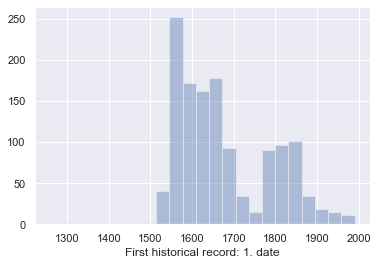

In [122]:
sns.distplot(Dates.astype(int), kde = False)

What are the later described plants?  Invasive or small?

In [123]:
By_species['Typical abundance where naturally occurring'].unique()

array([nan, 'scattered', 'frequent', 'dominant'], dtype=object)

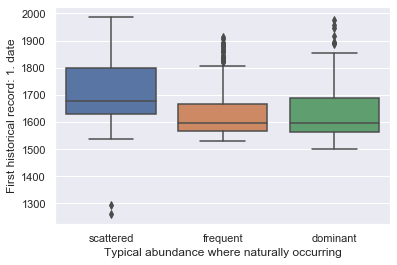

In [128]:
sns.boxplot(x="Typical abundance where naturally occurring", y="First historical record: 1. date", data=By_species)

nicer colours

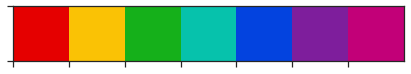

In [56]:
col_list = ["red", "goldenrod", "green",  "turquoise","blue",  "purple",  "magenta"]
sns.set_palette(sns.xkcd_palette(col_list))
sns.palplot(sns.color_palette())

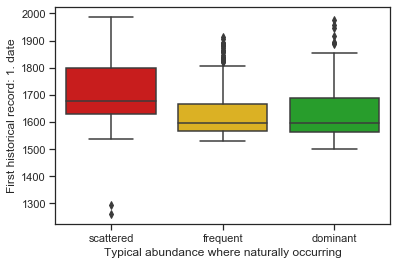

In [131]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Typical abundance where naturally occurring", y="First historical record: 1. date", data=By_species)

In [125]:
By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'].unique()

array([nan, '100-1000', '1-10', '0.1-1', '1.5', '10-100', '<0.1', '>1000'],
      dtype=object)

What's up with the 1.5 value?

In [163]:
squint = By_species[By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'] == '1.5']

In [165]:
len(squint)

1

In [167]:
squint

DataName       APG IV level 1 APG IV level 2 APG IV level 3 APG IV level 4  \
AccSpeciesName                                                               
Abies grandis             NaN            NaN            NaN            NaN   

DataName       APG IV level 5  Actual EvapoTranspiration  \
AccSpeciesName                                             
Abies grandis             NaN                      597.0   

DataName       After-ripening requirement  Altitude  \
AccSpeciesName                                        
Abies grandis                         NaN    1446.0   

DataName       Altitude (maximum recorded)  Altitude (minimum recorded)  \
AccSpeciesName                                                            
Abies grandis                         1830                          NaN   

DataName        Altitude (typical minimum)  Annual precipitation  \
AccSpeciesName                                                     
Abies grandis                        200.0                   NaN   

DataName       Annual seed dispersal Appendages on dispersal unit  \
AccSpeciesName                                                      
Abies grandis              irregular                        wings   

DataName        Average annual relative humidity  \
AccSpeciesName                                     
Abies grandis                               71.0   

DataName        Average number of ground frost days per year (sum) (FRS)  \
AccSpeciesName                                                             
Abies grandis                                               277.1          

DataName        British distribution (post 1949 records) Carnivory  \
AccSpeciesName                                                       
Abies grandis                                        NaN       NaN   

DataName        Change Index  Chromosome cDNA content Chromosome number  \
AccSpeciesName                                                            
Abies grandis            NaN                34.465333                24   

DataName        Chromosome ploidy Cleistogamy Clonality  Cloud cover  \
AccSpeciesName                                                         
Abies grandis                 2.0         NaN       NaN         71.4   

DataName       Comments, notes, methods Dataset (1)  \
AccSpeciesName                                        
Abies grandis                       NaN  TRY db 068   

DataName                                              Dataset (2) Dichogamy  \
AccSpeciesName                                                                
Abies grandis   Wirth C. The Functional Ecology of Trees (FET)...       NaN   

DataName       Dicliny (monoeceous, dioecious, hermaphrodite)  \
AccSpeciesName                                                  
Abies grandis                                      monoecious   

DataName       Dispersal syndrome (agent)  \
AccSpeciesName                              
Abies grandis                        wind   

DataName       Dispersal unit (dispersule / diaspore) length  EW Index  \
AccSpeciesName                                                           
Abies grandis                                            NaN       NaN   

DataName        Ecosystem rooting depth  Ellenberg indicator value: Light  \
AccSpeciesName                                                              
Abies grandis                       1.5                               NaN   

DataName        Ellenberg indicator value: Moisture  \
AccSpeciesName                                        
Abies grandis                                   NaN   

DataName        Ellenberg indicator value: Salt tolerance  \
AccSpeciesName                                              
Abies grandis                                         NaN   

DataName        Ellenberg indicator value: nitrogen  \
AccSpeciesName                                        
Abies grandis                                   NaN   

DataName        Ellenberg indica

Correct this

In [9]:
By_species.loc['Abies grandis', 'Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'] = '1-10'

In [171]:
By_species['Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded'].unique()

array([nan, '100-1000', '1-10', '0.1-1', '10-100', '<0.1', '>1000'],
      dtype=object)

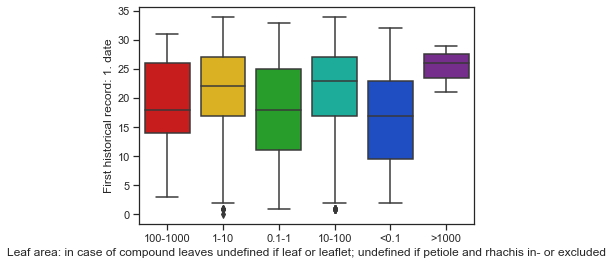

In [172]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", y="First historical record: 1. date", data=By_species)

re-order by size of leaf

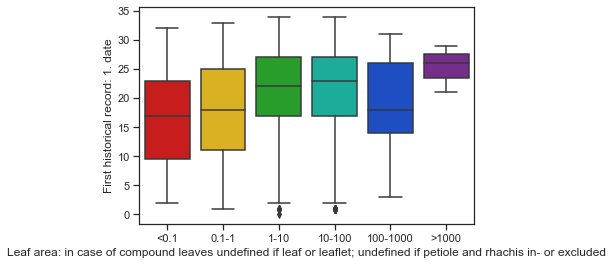

In [174]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
sns.despine()
sns.boxplot(x="Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded", y="First historical record: 1. date", data=By_species, order=["<0.1", "0.1-1", "1-10","10-100", "100-1000", ">1000"])

## Bigger leaved plants described earlier!

## How unique is the british flora?

In [134]:
Range = By_species["Number of European countries in which native"].dropna()

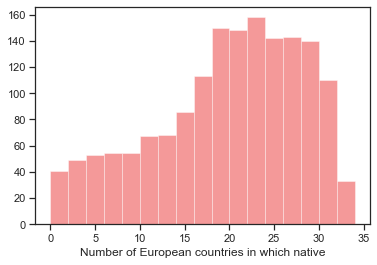

In [135]:
sns.distplot(Range.astype(int), kde = False)

Very few endemics - list them

In [136]:
By_species["First historical record: 1. date"] = pd.to_numeric(By_species["Number of European countries in which native"], errors='ignore')

In [138]:
By_species["Number of European countries in which native"].dropna().sort_values(ascending=True).head(20)

AccSpeciesName
Abies grandis                  0.0
Sorbus arranensis              1.0
Sorbus eminens                 1.0
Campanula portenschlagiana     1.0
Sorbus bristoliensis           1.0
Hieracium hanburyi             1.0
Limosella australis            1.0
Calamagrostis scotica          1.0
Hieracium senescens            1.0
Sisyrinchium bermudiana        1.0
Fumaria occidentalis           1.0
Primula scotica                1.0
Carex recta                    1.0
Gentianella anglica            1.0
Potamogeton epihydrus          1.0
Lactuca macrophylla            1.0
EUPHRASIA HESLOP-HARRISONII    1.0
Senecio cambrensis             1.0
Cymbalaria pallida             1.0
Hieracium calenduliflorum      1.0
Name: Number of European countries in which native, dtype: float64

In [144]:
endemic = By_species[By_species["Number of European countries in which native"]<2]

In [145]:
len(endemic)

41

List them

In [148]:
endemic.index

Index(['Abies grandis', 'Calamagrostis scotica', 'Campanula portenschlagiana',
       'Campanula poscharskyana', 'Carex recta', 'Cochlearia micacea',
       'Coincya wrightii', 'Cymbalaria pallida', 'EUPHRASIA HESLOP-HARRISONII',
       'Euphrasia cambrica', 'Euphrasia campbellae', 'Euphrasia marshallii',
       'Euphrasia rivularis', 'Euphrasia rotundifolia', 'Fumaria occidentalis',
       'Gentianella anglica', 'Hieracium calenduliflorum', 'Hieracium dewarii',
       'Hieracium hanburyi', 'Hieracium holosericeum', 'Hieracium senescens',
       'Lactuca macrophylla', 'Limosella australis', 'Potamogeton epihydrus',
       'Primula scotica', 'Senecio cambrensis', 'Sisyrinchium bermudiana',
       'Sorbus arranensis', 'Sorbus bristoliensis', 'Sorbus eminens',
       'Sorbus hibernica', 'Sorbus lancastriensis', 'Sorbus leptophylla',
       'Sorbus leyana', 'Sorbus minima', 'Sorbus porrigentiformis',
       'Sorbus pseudofennica', 'Sorbus subcuneata', 'Sorbus vexans',
       'Sorbus wilmot

Usual suspects - Sorbus, Euphrasia, Hawkweeds  
Students could look up th stories of these plants - Sorbus arranensis, Spartina anglica

How many are Archeopytes (pre-human part of UK flora)?

In [149]:
len(endemic[endemic["Species origin"]=='Neophyt in British Islands'])

32

In [150]:
len(endemic[endemic["Species origin"]=='Archeophyt in British Islands'])

8

Old UK-endemic species

In [152]:
endemic[endemic["Species origin"]=='Archeophyt in British Islands'].index

Index(['Abies grandis', 'Campanula portenschlagiana',
       'Campanula poscharskyana', 'Cymbalaria pallida', 'Lactuca macrophylla',
       'Potamogeton epihydrus', 'Sisyrinchium bermudiana', 'Spartina anglica'],
      dtype='object', name='AccSpeciesName')

Odd group. Recent hybrid species

In [94]:
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

## Heat maps and chi-squared

#### Is leaf margin related to shade tolerance?

In [153]:
By_species['Leaf shape: 2. outline'].unique()

array(['toothed', nan, 'lobed', 'entire', 'lobed and toothed',
       'crenate-serrate', 'crenate', 'crenate-dentate', 'serrulate',
       'dentate', 'subentire', 'sinuate'], dtype=object)

In [10]:
By_species['Tolerance to shade'].unique()

array(['light', nan, 'none', 'mid', 'deep'], dtype=object)

Heat map best approach here?

Count number in each category and heatmap of them

In [11]:
counts = By_species.groupby('Tolerance to shade', as_index=False)['Leaf shape: 2. outline'].count()

In [179]:
counts.head(6)

DataName Tolerance to shade  Leaf shape: 2. outline
0                      deep                     121
1                     light                     421
2                       mid                      36
3                      none                     986

In [12]:
counts = By_species.groupby(['Tolerance to shade', 'Leaf shape: 2. outline'], as_index=False)['Woodiness'].count()

In [13]:
counts.columns = ["Tolerance to shade", "Leaf shape: 2. outline", "count"]

In [195]:
counts.head(6)

Tolerance to shade Leaf shape: 2. outline  count
0               deep                crenate     10
1               deep                dentate      1
2               deep                 entire     61
3               deep                  lobed      8
4               deep      lobed and toothed     13
5               deep                toothed     28

In [31]:
count_matrix = counts.pivot("Tolerance to shade", "Leaf shape: 2. outline", "count")
count_matrix

Leaf shape: 2. outline  crenate  crenate-serrate  dentate  entire  lobed  \
Tolerance to shade                                                         
deep                       10.0              NaN      1.0    61.0    8.0   
light                      31.0              1.0      1.0   222.0   22.0   
mid                         NaN              2.0      NaN    15.0    2.0   
none                       35.0              NaN      NaN   609.0   72.0   

Leaf shape: 2. outline  lobed and toothed  serrulate  subentire  toothed  
Tolerance to shade                                                        
deep                                 13.0        NaN        NaN     28.0  
light                                43.0        2.0        NaN     98.0  
mid                                   1.0        1.0        1.0     12.0  
none                                 93.0        4.0        NaN    168.0

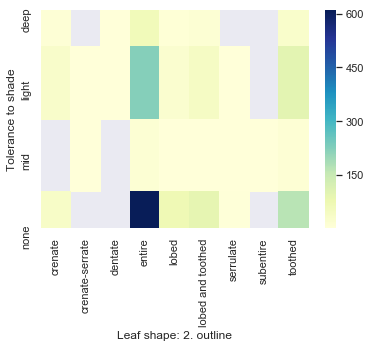

In [23]:
sns.heatmap(count_matrix, cmap="YlGnBu")

Some combinations do not exist.  
Most leaves entire.
Deep shade few entire.  
Is none no tolerance or is it no data?  

Remove None.  
Replace Nan with 0.  
Order categories light, mid, deep.
Group entire and non-entire.  

In [32]:
count_matrix = count_matrix.drop('none')

In [33]:
count_matrix = count_matrix.fillna(0)

In [34]:
count_matrix["jagged"] = count_matrix["crenate"] + 	count_matrix["crenate-serrate"] + count_matrix["dentate"] + count_matrix["lobed"] + count_matrix["lobed and toothed"] + count_matrix["serrulate"] + count_matrix["toothed"]

In [35]:
count_matrix["smooth"] =  count_matrix["entire"] + count_matrix["subentire"]

In [36]:
count_matrix

Leaf shape: 2. outline  crenate  crenate-serrate  dentate  entire  lobed  \
Tolerance to shade                                                         
deep                       10.0              0.0      1.0    61.0    8.0   
light                      31.0              1.0      1.0   222.0   22.0   
mid                         0.0              2.0      0.0    15.0    2.0   

Leaf shape: 2. outline  lobed and toothed  serrulate  subentire  toothed  \
Tolerance to shade                                                         
deep                                 13.0        0.0        0.0     28.0   
light                                43.0        2.0        0.0     98.0   
mid                                   1.0        1.0        1.0     12.0   

Leaf shape: 2. outline  jagged  smooth  
Tolerance to shade                      
deep                      60.0    61.0  
light                    198.0   222.0  
mid                       18.0    16.0

In [37]:
new_matrix = count_matrix[["smooth", "jagged"]]

In [39]:
new_matrix

Leaf shape: 2. outline  smooth  jagged
Tolerance to shade                    
deep                      61.0    60.0
light                    222.0   198.0
mid                       16.0    18.0

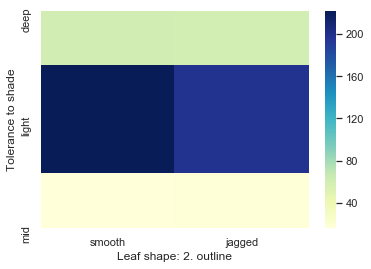

In [38]:
sns.heatmap(new_matrix, cmap="YlGnBu")

#### Chi squared this.  
Does distribution of leaf margin types differ between light enviroments?  

In [41]:
from scipy import stats

In [42]:
stats.chi2_contingency(new_matrix)

(0.5782653175701301, 0.748912848943901, 2, array([[ 62.92,  58.08],
        [218.4 , 201.6 ],
        [ 17.68,  16.32]]))

In [ ]:
0.578 = Chi squared statistic
0.7489 = P value
2 df


Nicer lay out:

In [43]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(new_matrix)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
0.5782653175701301


===Degrees of Freedom===
2


===P-Value===
0.748912848943901


===Contingency Table===
[[ 62.92  58.08]
 [218.4  201.6 ]
 [ 17.68  16.32]]


### Plotting data
Linear relationships
transforming data
ANOVA

#### Questions to address:
Is c value related to Leaf Nitrogen?

In [199]:
By_species.describe()

DataName  Actual EvapoTranspiration     Altitude  Altitude (minimum recorded)  \
count                   1384.000000  1394.000000                   976.000000   
mean                     528.353324   430.589670                    34.229508   
std                      156.115231   577.273006                   125.884239   
min                       79.000000    -4.000000                     0.000000   
25%                      425.000000    54.000000                     0.000000   
50%                      540.000000   252.000000                     0.000000   
75%                      629.000000   512.000000                     0.000000   
max                     1193.000000  4680.000000                   915.000000   

DataName  Altitude (typical minimum)  Annual precipitation  \
count                      69.000000           1619.000000   
mean                      332.553623           1046.582458   
std                       278.824172            320.478007   
min                         0.000000            553.000000   
25%                        90.000000            833.000000   
50%                       274.000000            986.000000   
75%                       600.000000           1127.000000   
max                      1000.000000           3218.000000   

DataName  Average annual relative humidity  \
count                          1383.000000   
mean                             74.028923   
std                              10.982121   
min                               2.000000   
25%                              70.000000   
50%                              76.000000   
75%                              81.000000   
max                              89.000000   

DataName  Average number of ground frost days per year (sum) (FRS)  \
count                                           1383.000000          
mean                                             204.516847          
std                                               62.658451          
min                                                6.000000          
25%                                              170.400000          
50%                                              206.900000          
75%                                              235.800000          
max                                              362.300000          

DataName  British distribution (post 1949 records)  Change Index  \
count                                   350.000000   1338.000000   
mean                                    133.328571     -0.009245   
std                                     204.127504      0.891124   
min                                       1.000000     -4.570000   
25%                                      29.000000     -0.477500   
50%                                      57.000000     -0.110000   
75%                                     128.000000      0.350000   
max                                    1243.000000      4.700000   

DataName  Chromosome cDNA content  Chromosome ploidy  Cloud cover  \
count                 1269.000000        1074.000000  1383.000000   
mean                     7.533740           3.017318    71.272813   
std                     13.755120           1.420746    12.733084   
min                      0.100000           2.000000    26.500000   
25%                      1.563571           2.000000    62.800000   
50%                      2.822273           2.666667    74.000000   
75%                      8.300000           3.468750    80.900000   
max                    216.000000          30.000000    87.600000   

DataName     EW Index  Ecosystem rooting depth  \
count     1582.000000              1271.000000   
mean         4.494513                 0.864831   
std          1.640641                 0.362752   
min          0.000000                 0.300000   
25%          3.680000                 0.600000   
50%          4.415000                 0.800000   
75%          5.030000                 1.100000   
max         10.000000         

What is Chromosome cDNA content?

In [47]:
UKFlora[UKFlora["DataName"] == "Chromosome cDNA content"].head(2)

SpeciesName  AccSpeciesID       AccSpeciesName  ObservationID  \
3922  Acer pseudoplatanus           855  Acer pseudoplatanus        1454485   
3924  Acer pseudoplatanus           855  Acer pseudoplatanus        1454486   

      ObsDataID  TraitID                                  TraitName  DataID  \
3922   10765720    224.0  Species genotype: chromosome cDNA content     603   
3924   10765722    224.0  Species genotype: chromosome cDNA content     603   

                     DataName            OriglName OrigValueStr OrigUnitStr  \
3922  Chromosome cDNA content  2C DNA content (pg)          2.4          pg   
3924  Chromosome cDNA content  2C DNA content (pg)          4.0          pg   

     ValueKindName OrigUncertaintyStr UncertaintyName Replicates  StdValue  \
3922        Single                NaN             NaN        NaN       2.4   
3924        Single                NaN             NaN        NaN       4.0   

     UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk  \
3922       pg                    NaN      3191212.0    4.18648   
3924       pg                    NaN            NaN   18.51100   

                                              Reference Comment  Unnamed: 27  
3922  Fitter, A. H. and H. J. Peat 1994. The Ecologi...    5.26          NaN  
3924  Fitter, A. H. and H. J. Peat 1994. The Ecologi...    5.26          NaN

Chromosome cDNA content is the 2c value in pg.  Might expect higher ammounts of DNA in plants with lower C:N ratios?  
    Or maybe in nitrogen rich enviroments?

Text(0.5, 6.799999999999979, 'Leaf carbon/nitrogen (C/N)')

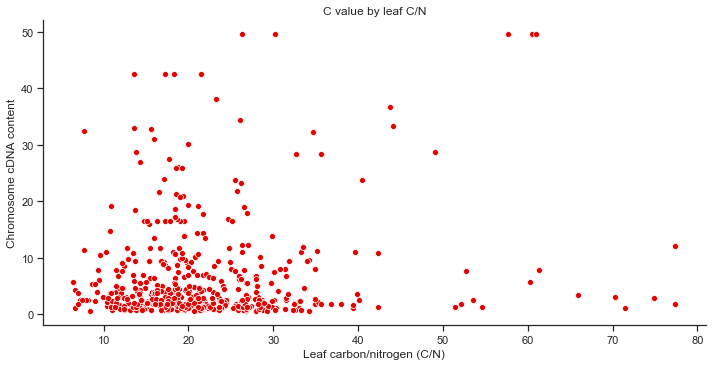

In [202]:
sns.relplot(
    data=By_species,
    x='Leaf carbon/nitrogen (C/N) ratio',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value by leaf C/N")
plt.xlabel("Leaf carbon/nitrogen (C/N)")

Does this dependant on Nitrogen richness in the soil?

Text(0.5, 6.799999999999979, 'Ellenberg indicator value: nitrogen')

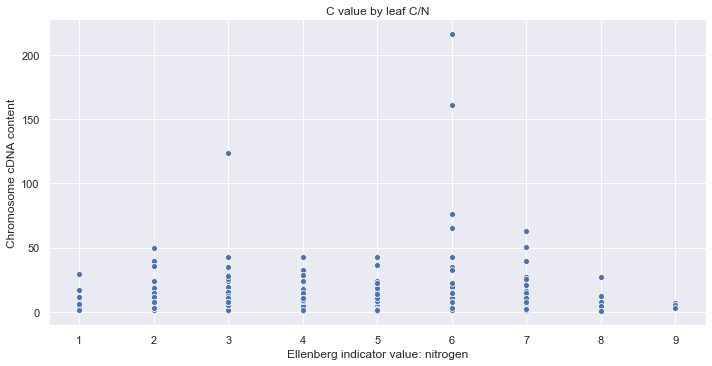

In [48]:
sns.relplot(
    data=By_species,
    x='Ellenberg indicator value: nitrogen',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value by leaf C/N")
plt.xlabel("Ellenberg indicator value: nitrogen")

Ellenberg indicator value: nitrogen is not continous data.    

TypeError: unsupported operand type(s) for /: 'str' and 'int'

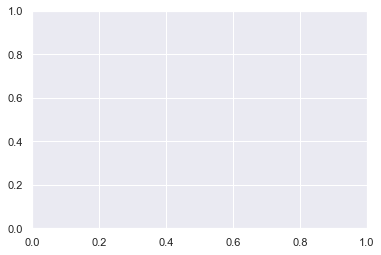

In [45]:
sns.boxplot(
    data=By_species,
    x='Ellenberg indicator value: nitrogen',
    y='Chromosome cDNA content')

plt.title("C value by leaf C/N")
plt.xlabel("Ellenberg indicator value: nitrogen")

Other nitrogen measures?

NDVI of the site  
NPP of the site (2)  
Soil N content per ground area  

In [50]:
UKFlora[UKFlora["DataName"] == "NDVI of the site"].head(1)

SpeciesName  AccSpeciesID       AccSpeciesName  \
1016  Holodiscus discolor (Pursh) Maxim.         29319  Holodiscus discolor   

      ObservationID  ObsDataID  TraitID TraitName  DataID          DataName  \
1016        3028226   29829661      NaN       NaN    7045  NDVI of the site   

     OriglName   OrigValueStr OrigUnitStr ValueKindName OrigUncertaintyStr  \
1016    NDVI3g  0.79449737072     no unit           NaN                NaN   

     UncertaintyName Replicates  StdValue UnitName  RelUncertaintyPercent  \
1016             NaN        NaN       NaN      NaN                    NaN   

      OrigObsDataID  ErrorRisk Reference  \
1016            NaN        NaN    unpub.   

                                                Comment  Unnamed: 27  
1016  The latest version of the GIMMS NDVI data set ...          NaN

In [51]:
UKFlora[UKFlora["DataName"] == "NPP of the site (2)"].head(1)

SpeciesName  AccSpeciesID       AccSpeciesName  \
1019  Holodiscus discolor (Pursh) Maxim.         29319  Holodiscus discolor   

      ObservationID  ObsDataID  TraitID TraitName  DataID  \
1019        3028226   29829664      NaN       NaN    7047   

                 DataName OriglName  OrigValueStr OrigUnitStr ValueKindName  \
1019  NPP of the site (2)      NPP2  484.79998779       gC/m2           NaN   

     OrigUncertaintyStr UncertaintyName Replicates  StdValue UnitName  \
1019                NaN             NaN        NaN       NaN      NaN   

      RelUncertaintyPercent  OrigObsDataID  ErrorRisk Reference  \
1019                    NaN            NaN        NaN    unpub.   

                                                Comment  Unnamed: 27  
1019  ISLSCP II IGBP NPP Output from 15 Terrestrial ...          NaN

In [52]:
UKFlora[UKFlora["DataName"] == "Soil N content per ground area"].head(1)

SpeciesName  AccSpeciesID       AccSpeciesName  \
1007  Holodiscus discolor (Pursh) Maxim.         29319  Holodiscus discolor   

      ObservationID  ObsDataID  TraitID TraitName  DataID  \
1007        3028226   29829652      NaN       NaN    4639   

                            DataName OriglName  OrigValueStr OrigUnitStr  \
1007  Soil N content per ground area       SND  1483.0899658        g/m2   

     ValueKindName OrigUncertaintyStr UncertaintyName Replicates  StdValue  \
1007           NaN                NaN             NaN        NaN       NaN   

     UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk Reference  \
1007      NaN                    NaN            NaN        NaN    unpub.   

                                           Comment  Unnamed: 27  
1007  Soil total nitrogen density (depth 0-100 cm)          NaN

In [49]:
UKFlora[UKFlora["DataName"] == "Net primary productivity of the site (NPP)"].head(1)

SpeciesName  AccSpeciesID       AccSpeciesName  \
1018  Holodiscus discolor (Pursh) Maxim.         29319  Holodiscus discolor   

      ObservationID  ObsDataID  TraitID TraitName  DataID  \
1018        3028226   29829663      NaN       NaN     200   

                                        DataName OriglName OrigValueStr  \
1018  Net primary productivity of the site (NPP)       NPP       1173.5   

     OrigUnitStr ValueKindName OrigUncertaintyStr UncertaintyName Replicates  \
1018       gC/m2           NaN                NaN             NaN        NaN   

      StdValue UnitName  RelUncertaintyPercent  OrigObsDataID  ErrorRisk  \
1018       NaN      NaN                    NaN            NaN        NaN   

     Reference                                            Comment  Unnamed: 27  
1018    unpub.  MODIS MOD17 annual/30-arcsec Net Primary Produ...          NaN

Text(0.5, 6.799999999999979, 'Soil N content per ground area')

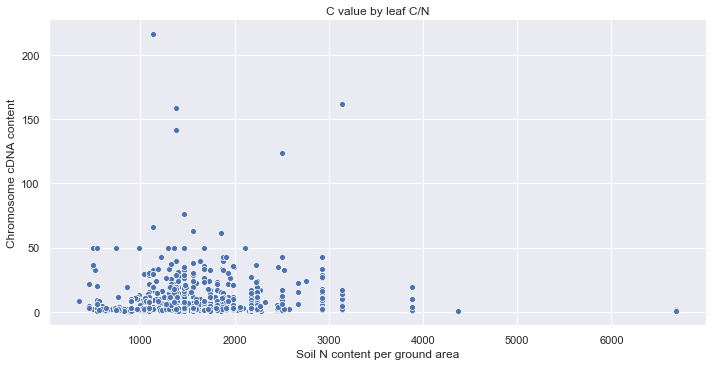

In [53]:
sns.relplot(
    data=By_species,
    x='Soil N content per ground area',
    y='Chromosome cDNA content',
    aspect=2
)

plt.title("C value by soil Nitrogen")
plt.xlabel("Soil N content per ground area")

Text(0.5, 6.799999999999979, 'Soil N content per ground area')

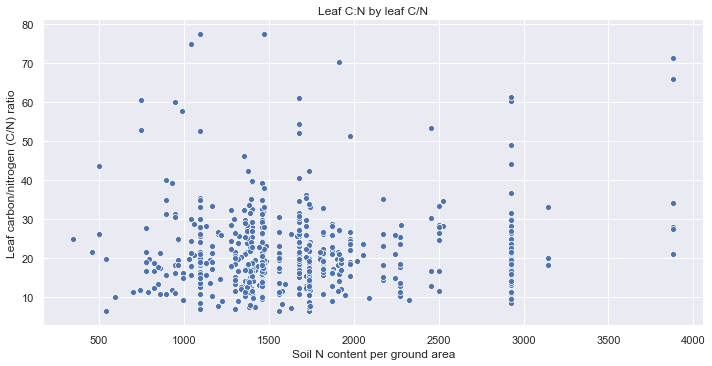

In [54]:
sns.relplot(
    data=By_species,
    x='Soil N content per ground area',
    y='Leaf carbon/nitrogen (C/N) ratio',
    aspect=2
)

plt.title("Leaf C:N by leaf C/N")
plt.xlabel("Soil N content per ground area")

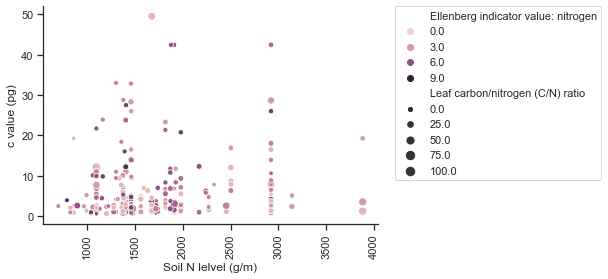

In [57]:
sns.set_style("ticks")
sns.set_palette(sns.xkcd_palette(col_list))
ax = sns.scatterplot(y="Chromosome cDNA content", x="Soil N content per ground area", data=By_species, size = "Leaf carbon/nitrogen (C/N) ratio", hue = "Ellenberg indicator value: nitrogen")
sns.despine()
plt.ylabel('c value (pg)')
plt.xlabel('Soil N lelvel (g/m)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.savefig('C-value_soilN.png',bbox_inches='tight')

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
model = ols('By_species["Chromosome cDNA content"] ~ By_species["Soil N content per ground area"]', By_species).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     By_species["Chromosome cDNA content"]   R-squared:                       0.001
Model:                                               OLS   Adj. R-squared:                  0.000
Method:                                    Least Squares   F-statistic:                     1.324
Date:                                   Wed, 18 Dec 2019   Prob (F-statistic):              0.250
Time:                                           17:51:31   Log-Likelihood:                -4672.7
No. Observations:                                   1152   AIC:                             9349.
Df Residuals:                                       1150   BIC:                             9359.
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

The left part of the first table provides basic information about the model fit:  
Dep. Variable Which variable is the response in the model  
Model What model you are using in the fit  
Method How the parameters of the model were calculated  
No. Observations The number of observations (examples)  
DF Residuals Degrees of freedom of the residuals. Number of observations - number of parameters  
DF Model Number of parameters in the model (not including the constant term if present)  
The right part of the first table shows the goodness of fit Element Description  
R-squared The coefficient of determination. A statistical measure of how well the regression line approximates the real data points  
Adj. R-squared The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals  
F-statistic A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals  
Prob (F-statistic) The probability that you would get the above statistic, given the null hypothesis that they are unrelated  
Log-likelihood The log of the likelihood function.  
AIC The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.  
BIC The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.  
The second table reports for each of the coefficients Description The name of the term in the model  
coef The estimated value of the coefficient  
std err The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.  
t The t-statistic value. This is a measure of how statistically significant the coefficient is.  
P > |t| P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.  
[95.0% Conf. Interval] The lower and upper values of the 95% confidence interval  

Finally, there are several statistical tests to assess the distribution of the residuals   Skewness A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).  
Kurtosis A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).  
Omnibus D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.  
Prob(Omnibus) The above statistic turned into a probability  
Jarque-Bera A different test of the skewness and kurtosis  
Prob (JB) The above statistic turned into a probability  
Durbin-Watson A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis  
Cond. No A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).  

In [69]:
model = ols('By_species["Chromosome cDNA content"] ~ By_species["Soil N content per ground area"]* By_species["Leaf carbon/nitrogen (C/N) ratio"]', By_species).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     By_species["Chromosome cDNA content"]   R-squared:                       0.041
Model:                                               OLS   Adj. R-squared:                  0.035
Method:                                    Least Squares   F-statistic:                     6.678
Date:                                   Wed, 18 Dec 2019   Prob (F-statistic):           0.000202
Time:                                           17:49:35   Log-Likelihood:                -1679.4
No. Observations:                                    468   AIC:                             3367.
Df Residuals:                                        464   BIC:                             3383.
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
                    

Stomatal density and cloud cover

Text(0.5, 6.799999999999979, 'Cloud cover')

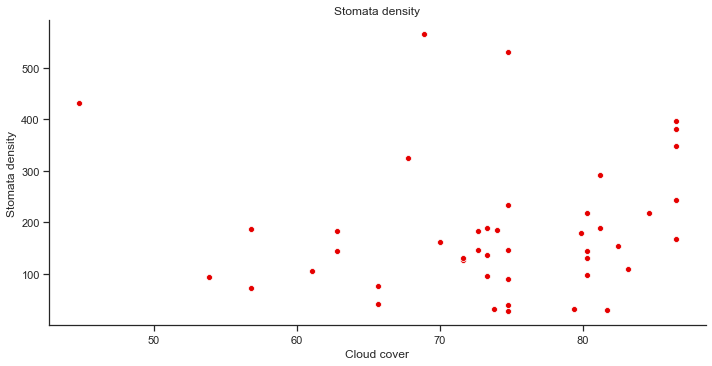

In [203]:
sns.relplot(
    data=By_species,
    x='Cloud cover',
    y='Stomata density',
    aspect=2
)

plt.title("Stomata density")
plt.xlabel("Cloud cover")

Text(0.5, 6.799999999999979, 'Flowering periode: peak month')

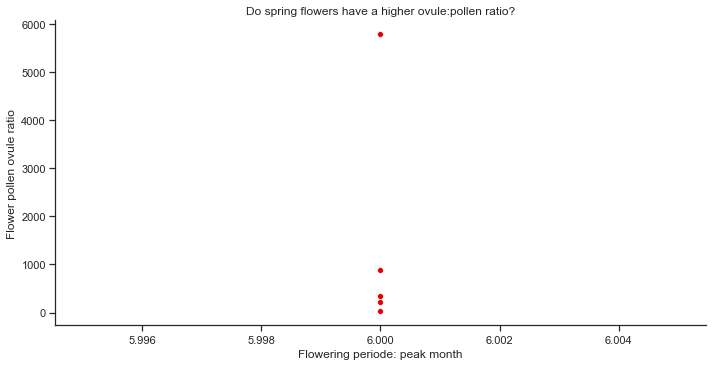

In [204]:
sns.relplot(
    data=By_species,
    x='Flowering periode: peak month',
    y='Flower pollen ovule ratio',
    aspect=2
)

plt.title("Do spring flowers have a higher ovule:pollen ratio?")
plt.xlabel("Flowering periode: peak month")

Only have flowering data for June!  

In [207]:
By_species["Flowering periode: peak month"].describe()

count    126.000000
mean       6.365079
std        1.541963
min        2.000000
25%        5.250000
50%        6.000000
75%        7.000000
max       11.000000
Name: Flowering periode: peak month, dtype: float64

No

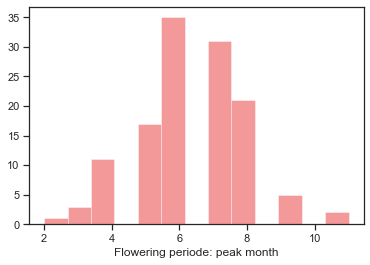

In [208]:
bloom = By_species["Flowering periode: peak month"].dropna()
sns.distplot(bloom.astype(int), kde = False)

Clearly some weird data collection behaviour here.  
The issue most be that few speices have data for 'Flower pollen ovule ratio'

In [209]:
By_species.isnull().sum()

DataName
APG IV level 1                                                                                                                                    1709
APG IV level 2                                                                                                                                    2086
APG IV level 3                                                                                                                                    2086
APG IV level 4                                                                                                                                    2226
APG IV level 5                                                                                                                                    2030
Actual EvapoTranspiration                                                                                                                         1647
After-ripening requirement                                                           

Better to count actual values rather than nulls

In [210]:
By_species.count()

DataName
APG IV level 1                                                                                                                                    1322
APG IV level 2                                                                                                                                     945
APG IV level 3                                                                                                                                     945
APG IV level 4                                                                                                                                     805
APG IV level 5                                                                                                                                    1001
Actual EvapoTranspiration                                                                                                                         1384
After-ripening requirement                                                           

In [ ]:
most data for

In [221]:
count = By_species.count()
count.sort_values(ascending=False)

DataName
Species origin                                                                                                                                    3007
Reference / source                                                                                                                                2220
Vegetation type / Biome                                                                                                                           2050
Chromosome number                                                                                                                                 1958
Carnivory                                                                                                                                         1844
Nutrition (autotroph versus heterotroph)                                                                                                          1842
Species status (nativity at growth location)                                         

In [214]:
 By_species.loc[:, By_species.dtypes == object]

DataName                               APG IV level 1 APG IV level 2  \
AccSpeciesName                                                         
ACAENA NOVAE-ZELANDIAE                       Eudicots  Core Eudicots   
ACAENA NOVAE-ZELANDIAE Kirk                       NaN            NaN   
ADIANTUM CAPILLUS-VENERIS                         NaN            NaN   
ALISMA PLANTAGO-AQUATICA                     Monocots            NaN   
APERA SPICA-VENTI                                 NaN            NaN   
...                                               ...            ...   
chamomilla chamomilla                             NaN            NaN   
lachenalii subsp. subsp. acuminatum               NaN            NaN   
lachenalii subsp. subsp. cruentifolium            NaN            NaN   
murorum subsp. subsp. oblongum                    NaN            NaN   
murorum subsp. subsp. sylvularum                  NaN            NaN   

DataName                               APG IV level 3 APG IV level 4  \
AccSpeciesName                                                         
ACAENA NOVAE-ZELANDIAE                    Superrosids         Rosids   
ACAENA NOVAE-ZELANDIAE Kirk                       NaN            NaN   
ADIANTUM CAPILLUS-VENERIS                         NaN            NaN   
ALISMA PLANTAGO-AQUATICA                          NaN            NaN   
APERA SPICA-VENTI                                 NaN            NaN   
...                                               ...            ...   
chamomilla chamomilla                             NaN            NaN   
lachenalii subsp. subsp. acuminatum               NaN            NaN   
lachenalii subsp. subsp. cruentifolium            NaN            NaN   
murorum subsp. subsp. oblongum                    NaN            NaN   
murorum subsp. subsp. sylvularum                  NaN            NaN   

DataName                               APG IV level 5  \
AccSpeciesName                                          
ACAENA NOVAE-ZELANDIAE                         Fabids   
ACAENA NOVAE-ZELANDIAE Kirk                       NaN   
ADIANTUM CAPILLUS-VENERIS                         NaN   
ALISMA PLANTAGO-AQUATICA                          NaN   
APERA SPICA-VENTI                                 NaN   
...                                               ...   
chamomilla chamomilla                             NaN   
lachenalii subsp. subsp. acuminatum               NaN   
lachenalii subsp. subsp. cruentifolium            NaN   
murorum subsp. subsp. oblongum                    NaN   
murorum subsp. subsp. sylvularum                  NaN   

DataName                               After-ripening requirement  \
AccSpeciesName                                                      
ACAENA NOVAE-ZELANDIAE                                        NaN   
ACAENA NOVAE-ZELANDIAE Kirk                                   NaN   
ADIANTUM CAPILLUS-VENERIS                                     NaN   
ALISMA PLANTAGO-AQUATICA                                      NaN   
APERA SPICA-VENTI                                             NaN   
...                                                           ...   
chamomilla chamomilla                                         NaN   
lachenalii subsp. subsp. acuminatum                           NaN   
lachenalii subsp. subsp. cruentifolium                        NaN   
murorum subsp. subsp. oblongum                                NaN   
murorum subsp. subsp. sylvularum                              NaN   

DataName                               Altitude (maximum recorded)  \
AccSpeciesName                                                       
ACAENA NOVAE-ZELANDIAE                                         NaN   
ACAENA NOVAE-ZELANDIAE Kirk                                    NaN   
ADIANTUM CAPILLUS-VENERIS                                      NaN   
ALISMA PLANTAGO-AQUATICA                                       381   
APERA SPICA-VENTI                                              NaN

In [215]:
 By_species.loc[:, By_species.dtypes == float]

DataName                                Actual EvapoTranspiration  Altitude  \
AccSpeciesName                                                                
ACAENA NOVAE-ZELANDIAE                                        NaN      11.0   
ACAENA NOVAE-ZELANDIAE Kirk                                   NaN       NaN   
ADIANTUM CAPILLUS-VENERIS                                   494.0     536.0   
ALISMA PLANTAGO-AQUATICA                                    417.0      89.0   
APERA SPICA-VENTI                                             NaN       NaN   
...                                                           ...       ...   
chamomilla chamomilla                                         NaN       NaN   
lachenalii subsp. subsp. acuminatum                           NaN       NaN   
lachenalii subsp. subsp. cruentifolium                        NaN       NaN   
murorum subsp. subsp. oblongum                                NaN       NaN   
murorum subsp. subsp. sylvularum                              NaN       NaN   

DataName                                Altitude (minimum recorded)  \
AccSpeciesName                                                        
ACAENA NOVAE-ZELANDIAE                                          0.0   
ACAENA NOVAE-ZELANDIAE Kirk                                     NaN   
ADIANTUM CAPILLUS-VENERIS                                       NaN   
ALISMA PLANTAGO-AQUATICA                                        0.0   
APERA SPICA-VENTI                                               NaN   
...                                                             ...   
chamomilla chamomilla                                           0.0   
lachenalii subsp. subsp. acuminatum                             NaN   
lachenalii subsp. subsp. cruentifolium                          NaN   
murorum subsp. subsp. oblongum                                  NaN   
murorum subsp. subsp. sylvularum                                NaN   

DataName                                Altitude (typical minimum)  \
AccSpeciesName                                                       
ACAENA NOVAE-ZELANDIAE                                         NaN   
ACAENA NOVAE-ZELANDIAE Kirk                                    NaN   
ADIANTUM CAPILLUS-VENERIS                                      NaN   
ALISMA PLANTAGO-AQUATICA                                       NaN   
APERA SPICA-VENTI                                              NaN   
...                                                            ...   
chamomilla chamomilla                                          NaN   
lachenalii subsp. subsp. acuminatum                            NaN   
lachenalii subsp. subsp. cruentifolium                         NaN   
murorum subsp. subsp. oblongum                                 NaN   
murorum subsp. subsp. sylvularum                               NaN   

DataName                                Annual precipitation  \
AccSpeciesName                                                 
ACAENA NOVAE-ZELANDIAE                                 831.0   
ACAENA NOVAE-ZELANDIAE Kirk                              NaN   
ADIANTUM CAPILLUS-VENERIS                             1101.0   
ALISMA PLANTAGO-AQUATICA                               950.0   
APERA SPICA-VENTI                                      726.0   
...                                                      ...   
chamomilla chamomilla                                  868.0   
lachenalii subsp. subsp. acuminatum                      NaN   
lachenalii subsp. subsp. cruentifolium                   NaN   
murorum subsp. subsp. oblongum                           NaN   
murorum subsp. subsp. sylvularum                         NaN   

DataName                                Average annual relative humidity  \
AccSpeciesName                                                             
ACAENA NOVAE-ZELANDIAE                                              81.0   
ACAENA NOVAE-ZELANDIAE Kirk                                          NaN   


In [216]:
 By_species.loc[:, By_species.dtypes == int]

Empty DataFrame
Columns: []
Index: [ACAENA NOVAE-ZELANDIAE, ACAENA NOVAE-ZELANDIAE Kirk, ADIANTUM CAPILLUS-VENERIS, ALISMA PLANTAGO-AQUATICA, APERA SPICA-VENTI, APERA SPICA-VENTI (L.) P. Beauv., ARCTOSTAPHYLOS UVA-URSI, ASPLENIUM ADIANTUM-NIGRUM L., ASPLENIUM RUTA-MURARIA L., ASPLENIUM TRICHOMANES-RAMOSUM L., ASTER NOVI-BELGII L., Abies alba, Abies grandis, Abies nordmanniana, Abies procera, Abutilon theophrasti, Acacia melanoxylon, Acaena anserinifolia, Acaena inermis, Acaena ovalifolia, Acanthus mollis, Acanthus spinosus, Acer campestre, Acer cappadocicum, Acer negundo, Acer platanoides, Acer pseudoplatanus, Acer saccharinum, Achillea ligustica, Achillea maritima, Achillea millefolium, Achillea ptarmica, Aconitum napellus, Aconitum vulparia, Acorus calamus, Acorus gramineus, Actaea spicata, Adonis annua, Adoxa moschatellina, Aegopodium podagraria, Aeonium cuneatum, Aesculus carnea, Aesculus hippocastanum, Aesculus indica, Aethusa cynapium, Aethusa cynapium subsp. segetalis, Agapanthus praecox, Agave americana, Ageratum houstonianum, Agrimonia eupatoria, Agrimonia procera, Agrostemma githago, Agrostis avenacea, Agrostis canina, Agrostis capillaris, Agrostis castellana, Agrostis curtisii, Agrostis gigantea, Agrostis hyemalis, Agrostis lachnantha, Agrostis scabra, Agrostis stolonifera, Agrostis vinealis, Ailanthus altissima, Aira caryophyllea, Aira praecox, Ajuga chamaepitys, Ajuga pyramidalis, Ajuga reptans, Alcea rosea, Alchemilla acutiloba, Alchemilla alpina, Alchemilla conjuncta, Alchemilla filicaulis, Alchemilla glabra, Alchemilla glaucescens, Alchemilla glomerulans, Alchemilla incisa, Alchemilla mollis, Alchemilla monticola, Alchemilla subcrenata, Alchemilla wichurae, Alchemilla xanthochlora, Alisma gramineum, Alisma lanceolatum, Alliaria petiolata, Allium ampeloprasum, Allium carinatum, Allium cepa, Allium moly, Allium neapolitanum, Allium nigrum, Allium obliquum, Allium oleraceum, Allium paradoxum, Allium pendulinum, Allium roseum, Allium sativum, Allium schoenoprasum, Allium scorodoprasum, ...]

[3031 rows x 0 columns]

### Co-variance

How correalted are the environmental measures?  

In [78]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [80]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [82]:
 print_full(By_species.columns)

Index(['APG IV level 1', 'APG IV level 2', 'APG IV level 3', 'APG IV level 4', 'APG IV level 5', 'Actual EvapoTranspiration', 'After-ripening requirement', 'Altitude', 'Altitude (maximum recorded)', 'Altitude (minimum recorded)',
       ...
       'Tolerance to grazing', 'Tolerance to shade', 'Typical abundance where naturally occurring', 'Vegetation type / Biome', 'Vegetative regeneration / reproduction (clonal spread)', 'Vegetative reproduction: pattern forming', 'Water vapor pressure (kPa)', 'Wetness/Humidity/Aridity of area where samples were taken', 'Wind speed (m s-1)', 'Woodiness'], dtype='object', name='DataName', length=255)


In [83]:
display(By_species.columns)

Index(['APG IV level 1', 'APG IV level 2', 'APG IV level 3', 'APG IV level 4',
       'APG IV level 5', 'Actual EvapoTranspiration',
       'After-ripening requirement', 'Altitude', 'Altitude (maximum recorded)',
       'Altitude (minimum recorded)',
       ...
       'Tolerance to grazing', 'Tolerance to shade',
       'Typical abundance where naturally occurring',
       'Vegetation type / Biome',
       'Vegetative regeneration / reproduction (clonal spread)',
       'Vegetative reproduction: pattern forming',
       'Water vapor pressure (kPa)',
       'Wetness/Humidity/Aridity of area where samples were taken',
       'Wind speed (m s-1)', 'Woodiness'],
      dtype='object', name='DataName', length=255)

In [85]:
print(By_species.columns)

Index(['APG IV level 1', 'APG IV level 2', 'APG IV level 3', 'APG IV level 4',
       'APG IV level 5', 'Actual EvapoTranspiration',
       'After-ripening requirement', 'Altitude', 'Altitude (maximum recorded)',
       'Altitude (minimum recorded)',
       ...
       'Tolerance to grazing', 'Tolerance to shade',
       'Typical abundance where naturally occurring',
       'Vegetation type / Biome',
       'Vegetative regeneration / reproduction (clonal spread)',
       'Vegetative reproduction: pattern forming',
       'Water vapor pressure (kPa)',
       'Wetness/Humidity/Aridity of area where samples were taken',
       'Wind speed (m s-1)', 'Woodiness'],
      dtype='object', name='DataName', length=255)


In [87]:
for col in  By_species.loc[:, By_species.dtypes == float]: 
    print(col) 

Actual EvapoTranspiration
Altitude
Altitude (minimum recorded)
Altitude (typical minimum)
Annual precipitation
Average annual relative humidity
Average number of ground frost days per year (sum) (FRS)
British distribution (post 1949 records)
Change Index
Chromosome cDNA content
Chromosome ploidy
Cloud cover
EW Index
Ecosystem rooting depth
Ellenberg indicator value: Light
Ellenberg indicator value: Moisture
Ellenberg indicator value: Salt tolerance
Ellenberg indicator value: nitrogen
Ellenberg indicator value: pH (reaction)
End of flowering
Fern  and moss spore width (diameter)
First historical record: 1. date
Flower pollen ovule ratio
Flowering periode: peak month
Fraction of absorbed photosynthetic active radiation (FAPAR) of the site
GPP of the site
Identifier within contributed dataset (ID)
January mean temperature
July mean temperature
Latitude
Leaf Relative water content (water content / water content at saturation)
Leaf Water content (molar) per leaf dry mass (WCd)
Leaf Water co

Eniviromental variables:

In [ ]:
"Actual EvapoTranspiration","
Altitude","
Altitude (maximum recorded)","
Altitude (minimum recorded)","
Altitude (typical minimum)","
Annual precipitation","
Average annual relative humidity","
Average number of ground frost days per year (sum) (FRS)","
Cloud cover","
Fraction of absorbed photosynthetic active radiation (FAPAR) of the site","
GPP of the site","
January mean temperature","
July mean temperature","
Latitude","
Length of growing season (LGP)","
Longitude","
Maximum Green Vegetation Fraction","
Mean annual sum of potential evapotranspiration (PET)","
Mean annual temperature (MAT)","
Mean clear-sky surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean cloud forcing surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean cloud surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","
Mean number of wet days per year","
Mean sum of annual precipitation (PPT / MAP / TAP)","
NDVI of the site","
NPP of the site (2)","
Net primary productivity of the site (NPP)","
Precipitation of Coldest Quarter","
Precipitation of Driest Month","
Precipitation of Driest Quarter","
Precipitation of Warmest Quarter","
Precipitation of Wettest Month","
Precipitation of Wettest Quarter","
Soil C content per ground area","
Soil N content per ground area","
Soil bulk density","
Soil field capacity","
Soil ph","
Soil plant available water capacity of rooting zone (derived from remote sensing) 1","
Soil plant available water capacity of rooting zone (derived from remote sensing) 2","
Soil profile available water capacity","
Soil thermal capacity","
Soil water content (SWC)","
Soil wilting point","
Solar radiation (kJ m-2 day-1)","
Temperature sum of growing degree days (GDD)","
Temperature: Annual Range","
Temperature: Isothermality (BIO2/BIO7) (* 100)","
Temperature: Max Temperature of Warmest Month","
Temperature: Mean Diurnal Range (Mean of monthly (max temp - min temp))","
Temperature: Mean Temperature of Coldest Quarter","
Temperature: Mean Temperature of Driest Quarter","
Temperature: Mean Temperature of Warmest Quarter","
Temperature: Mean Temperature of Wettest Quarter","
Temperature: Min Temperature of Coldest Month","
Temperature: Seasonality (standard deviation *100)","
Terrestrial chlorophyll index of the site","
Water vapor pressure (kPa)","
Wetness/Humidity/Aridity of area where samples were taken","
Wind speed (m s-1)","

Leaf Measures:

In [ ]:
"Leaf Relative water content (water content / water content at saturation)","
Leaf Water content (molar) per leaf dry mass (WCd)","
Leaf Water content saturating (molar) (WCs)","
Leaf Water content total (molar) (WCt)","
Leaf area index of the site (LAI)","
Leaf carbon content per dry mass","
Leaf carbon/nitrogen (C/N) ratio","
Leaf carotenoid content per dry mass","
Leaf chlorophyll a content per dry mass","
Leaf chlorophyll a/b ratio","
Leaf chlorophyll b content per dry mass","
Leaf chlorophyll content (a+b) per dry mass","
Leaf dry matter content per leaf water-saturated mass (LDMC)","
Leaf petiole length","
Leaf respiration per dry mass","
Leaf thickness","
Leaf tissue density","
Leaf transpiration (molar) per dry mass","
Leaf transpiration rate per dry mass (daytime)","
Leaf water content per leaf dry mass","
Leaf water content per leaf water-saturated mass (LWC, 1-LDMC)","
Leaf water content saturating","
Leaf water content total","
Leaf water saturation deficit","
Photosynthesis per leaf dry mass (Amass)","
Plant relative growth rate (RGR)","
SLA: undefined if petiole in- or excluded"

How correlated are the leaf measures?  

In [164]:
leaf = By_species[["Leaf Relative water content (water content / water content at saturation)","Leaf Water content (molar) per leaf dry mass (WCd)","Leaf Water content saturating (molar) (WCs)","Leaf Water content total (molar) (WCt)","Leaf area index of the site (LAI)","Leaf carbon content per dry mass","Leaf carbon/nitrogen (C/N) ratio","Leaf carotenoid content per dry mass","Leaf chlorophyll a content per dry mass","Leaf chlorophyll a/b ratio","Leaf chlorophyll b content per dry mass","Leaf chlorophyll content (a+b) per dry mass","Leaf dry matter content per leaf water-saturated mass (LDMC)","Leaf petiole length","Leaf respiration per dry mass","Leaf thickness","Leaf tissue density","Leaf transpiration (molar) per dry mass","Leaf transpiration rate per dry mass (daytime)","Leaf water content per leaf dry mass","Leaf water content per leaf water-saturated mass (LWC, 1-LDMC)","Leaf water content saturating","Leaf water content total","Leaf water saturation deficit","Photosynthesis per leaf dry mass (Amass)","Plant relative growth rate (RGR)","SLA: undefined if petiole in- or excluded"]]

In [124]:
env = By_species[["Actual EvapoTranspiration","Altitude","Altitude (maximum recorded)","Altitude (minimum recorded)","Altitude (typical minimum)","Annual precipitation","Average annual relative humidity","Average number of ground frost days per year (sum) (FRS)","Cloud cover","Fraction of absorbed photosynthetic active radiation (FAPAR) of the site","GPP of the site","January mean temperature","July mean temperature","Latitude","Length of growing season (LGP)","Longitude","Maximum Green Vegetation Fraction","Mean annual sum of potential evapotranspiration (PET)","Mean annual temperature (MAT)","Mean clear-sky surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean cloud forcing surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean cloud surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements","Mean number of wet days per year","Mean sum of annual precipitation (PPT / MAP / TAP)","NDVI of the site","NPP of the site (2)","Net primary productivity of the site (NPP)","Precipitation of Coldest Quarter","Precipitation of Driest Month","Precipitation of Driest Quarter","Precipitation of Warmest Quarter","Precipitation of Wettest Month","Precipitation of Wettest Quarter","Soil C content per ground area","Soil N content per ground area","Soil bulk density","Soil field capacity","Soil ph","Soil plant available water capacity of rooting zone (derived from remote sensing) 1","Soil plant available water capacity of rooting zone (derived from remote sensing) 2","Soil profile available water capacity","Soil thermal capacity","Soil water content (SWC)","Soil wilting point","Solar radiation (kJ m-2 day-1)","Temperature sum of growing degree days (GDD)","Temperature: Annual Range","Temperature: Isothermality (BIO2/BIO7) (* 100)","Temperature: Max Temperature of Warmest Month","Temperature: Mean Diurnal Range (Mean of monthly (max temp - min temp))","Temperature: Mean Temperature of Coldest Quarter","Temperature: Mean Temperature of Driest Quarter","Temperature: Mean Temperature of Warmest Quarter","Temperature: Mean Temperature of Wettest Quarter","Temperature: Min Temperature of Coldest Month","Temperature: Seasonality (standard deviation *100)","Terrestrial chlorophyll index of the site","Water vapor pressure (kPa)","Wetness/Humidity/Aridity of area where samples were taken","Wind speed (m s-1)"]]

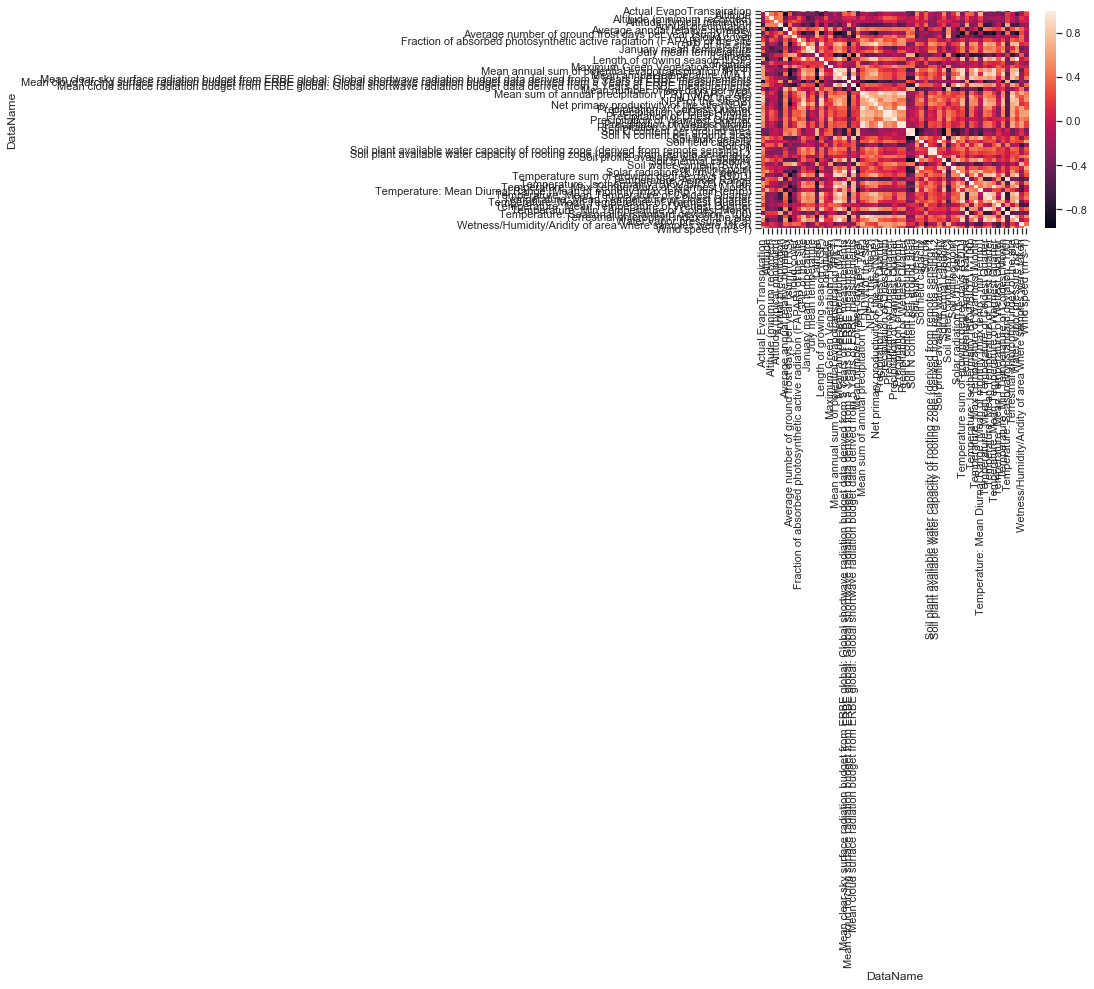

In [98]:
# calculate the correlation matrix
corr = env.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

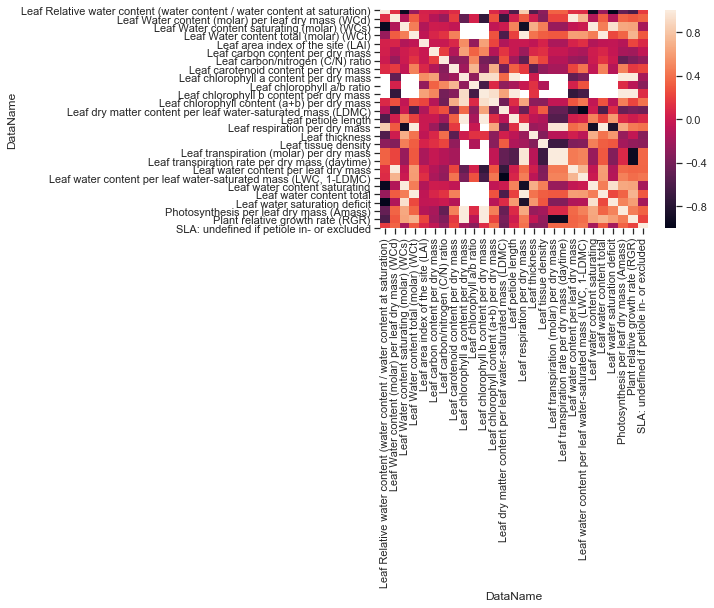

In [156]:
# calculate the correlation matrix
corr = leaf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [95]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(env, 'ward')
c, coph_dists = cophenet(Z, pdist(env))
c

ValueError: could not convert string to float: '1,200'

In [104]:
env.count()

DataName
Actual EvapoTranspiration                                                                                                                         1384
Altitude                                                                                                                                          1394
Altitude (maximum recorded)                                                                                                                       1033
Altitude (minimum recorded)                                                                                                                        976
Altitude (typical minimum)                                                                                                                          69
Annual precipitation                                                                                                                              1619
Average annual relative humidity                                                     

missing some data.

In [108]:
env = env.apply(pd.to_numeric, errors = 'coerce')

If ‘coerce’, then invalid parsing will be set as NaN

In [ ]:
find the '1,200' value

In [ ]:
env == '1,200'

In [130]:
env.replace(to_replace = '1,200', value = '1200', inplace = True)

In [131]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(env, 'ward')
c, coph_dists = cophenet(Z, pdist(env))
c

ValueError: The condensed distance matrix must contain only finite values.

In [132]:
env = env.dropna()

In [133]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(env, 'ward')
c, coph_dists = cophenet(Z, pdist(env))
c

0.6820111065827219

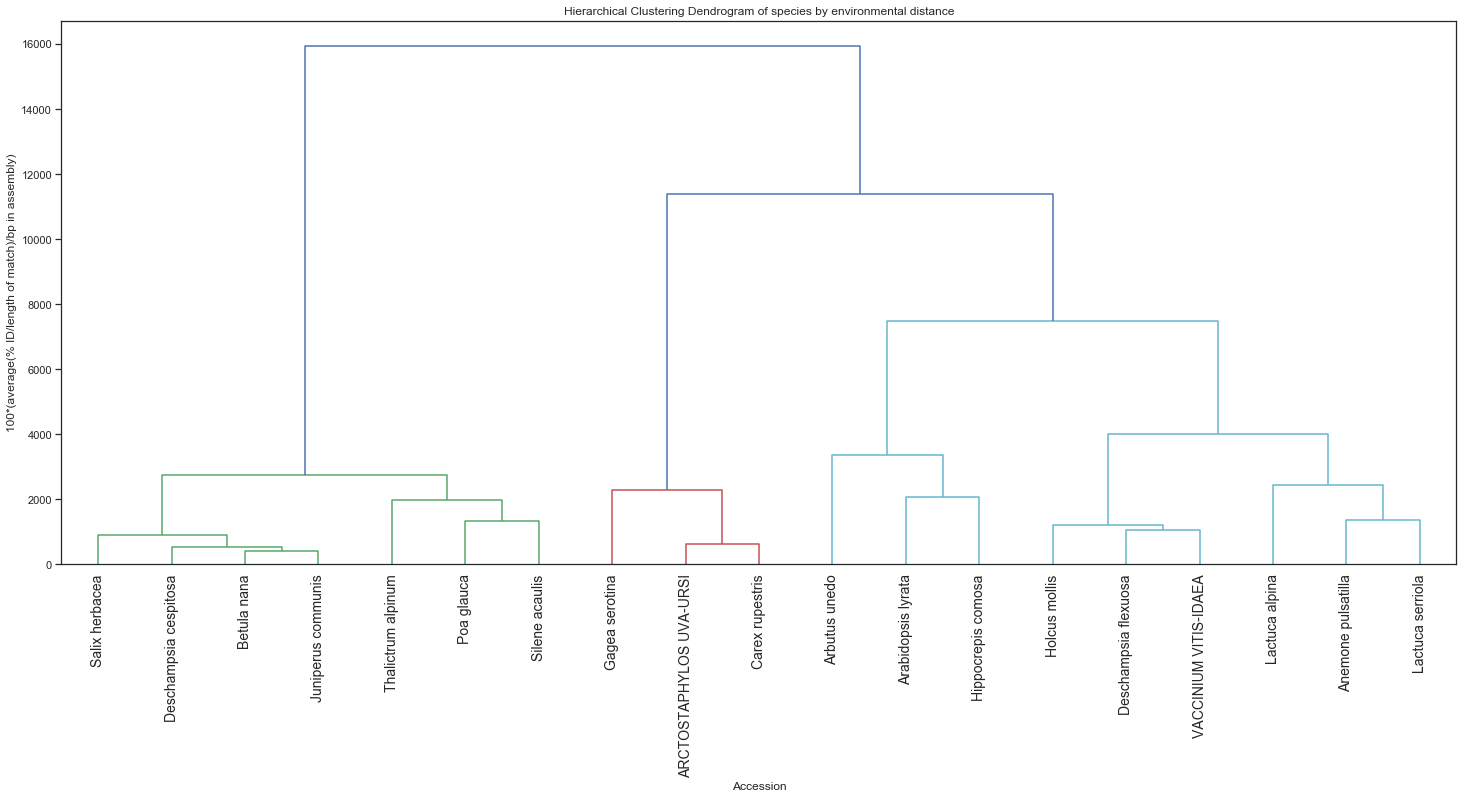

In [134]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of species by environmental distance')
plt.xlabel('Accession')
plt.ylabel('100*(average(% ID/length of match)/bp in assembly)')
dendrogram(
    Z,
    labels=(env.index),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

AH! I wanted to cluster environemtnal traits....
Very few speices with infomation for all the traits...

In [135]:
tr_env = env.transpose()

In [136]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(tr_env, 'ward')
c, coph_dists = cophenet(Z, pdist(tr_env))
c

0.9237478130917623

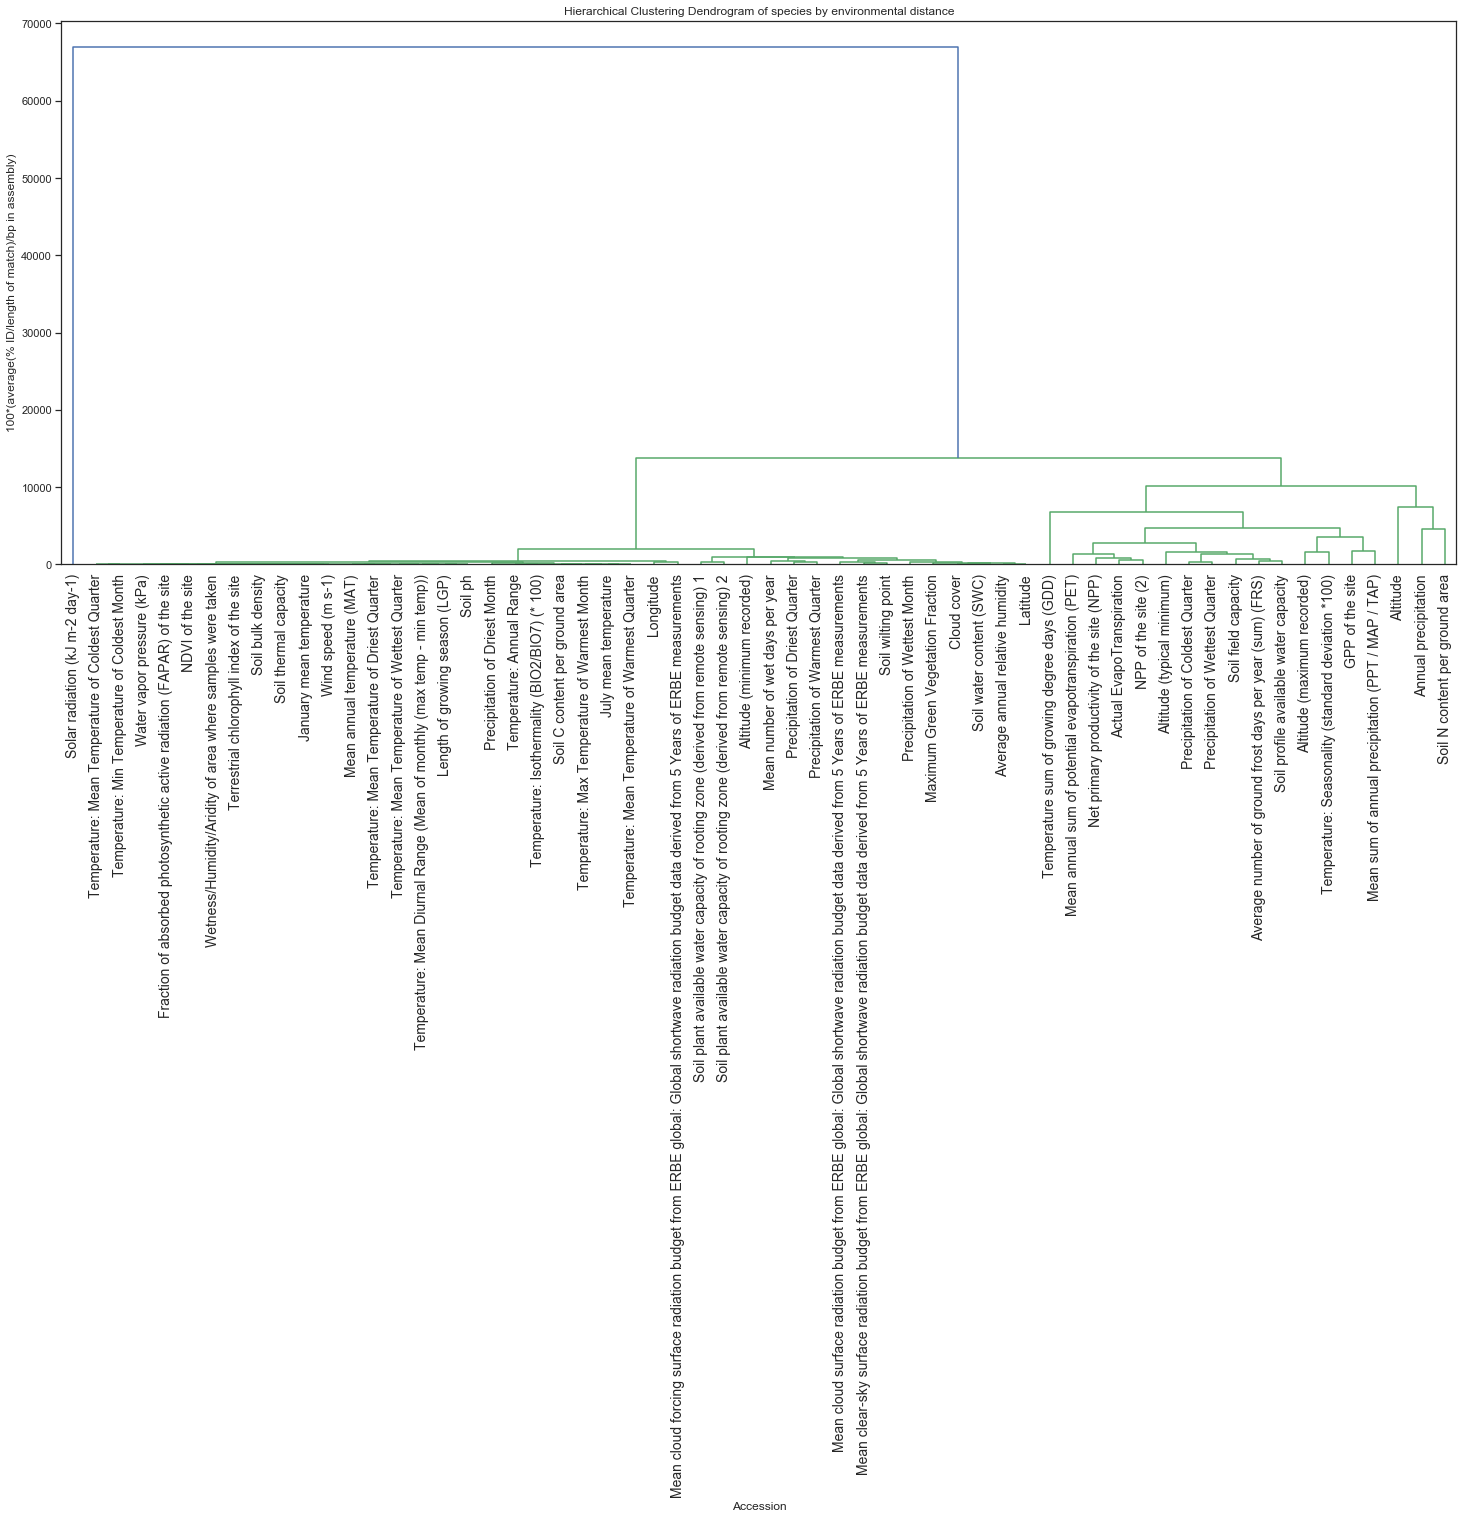

In [137]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of species by environmental distance')
plt.xlabel('Accession')
plt.ylabel('100*(average(% ID/length of match)/bp in assembly)')
dendrogram(
    Z,
    labels=(tr_env.index),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

Unexpected - due to loss of data for most species from droping NaNs?

In [165]:
tr_leaf = leaf.transpose()

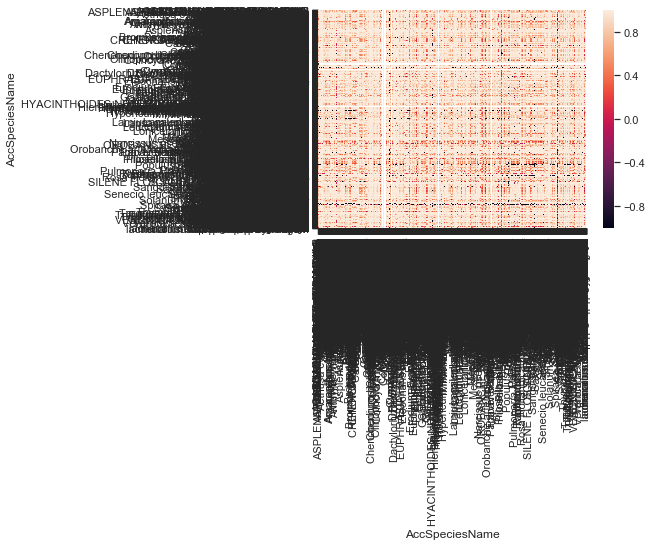

In [159]:
# calculate the correlation matrix
corr = tr_leaf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [160]:
tr_leaf = tr_leaf.dropna()

In [161]:
# calculate the correlation matrix
corr = tr_leaf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
Why do I loose ALL data - every row adn every column has NaN?

In [163]:
tr_leaf.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [ACAENA NOVAE-ZELANDIAE, ACAENA NOVAE-ZELANDIAE Kirk, ADIANTUM CAPILLUS-VENERIS, ALISMA PLANTAGO-AQUATICA, APERA SPICA-VENTI, APERA SPICA-VENTI (L.) P. Beauv., ARCTOSTAPHYLOS UVA-URSI, ASPLENIUM ADIANTUM-NIGRUM L., ASPLENIUM RUTA-MURARIA L., ASPLENIUM TRICHOMANES-RAMOSUM L., ASTER NOVI-BELGII L., Abies alba, Abies grandis, Abies nordmanniana, Abies procera, Abutilon theophrasti, Acacia melanoxylon, Acaena anserinifolia, Acaena inermis, Acaena ovalifolia, Acanthus mollis, Acanthus spinosus, Acer campestre, Acer cappadocicum, Acer negundo, Acer platanoides, Acer pseudoplatanus, Acer saccharinum, Achillea ligustica, Achillea maritima, Achillea millefolium, Achillea ptarmica, Aconitum napellus, Aconitum vulparia, Acorus calamus, Acorus gramineus, Actaea spicata, Adonis annua, Adoxa moschatellina, Aegopodium podagraria, Aeonium cuneatum, Aesculus carnea, Aesculus hippocastanum, Aesculus indica, Aethusa cynapium, Aethusa cynapium sub

RE-generate tr_leaf and re-do

In [166]:
# generate the linkage matrix
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(tr_leaf, 'ward')
c, coph_dists = cophenet(Z, pdist(tr_leaf))
c

ValueError: The condensed distance matrix must contain only finite values.

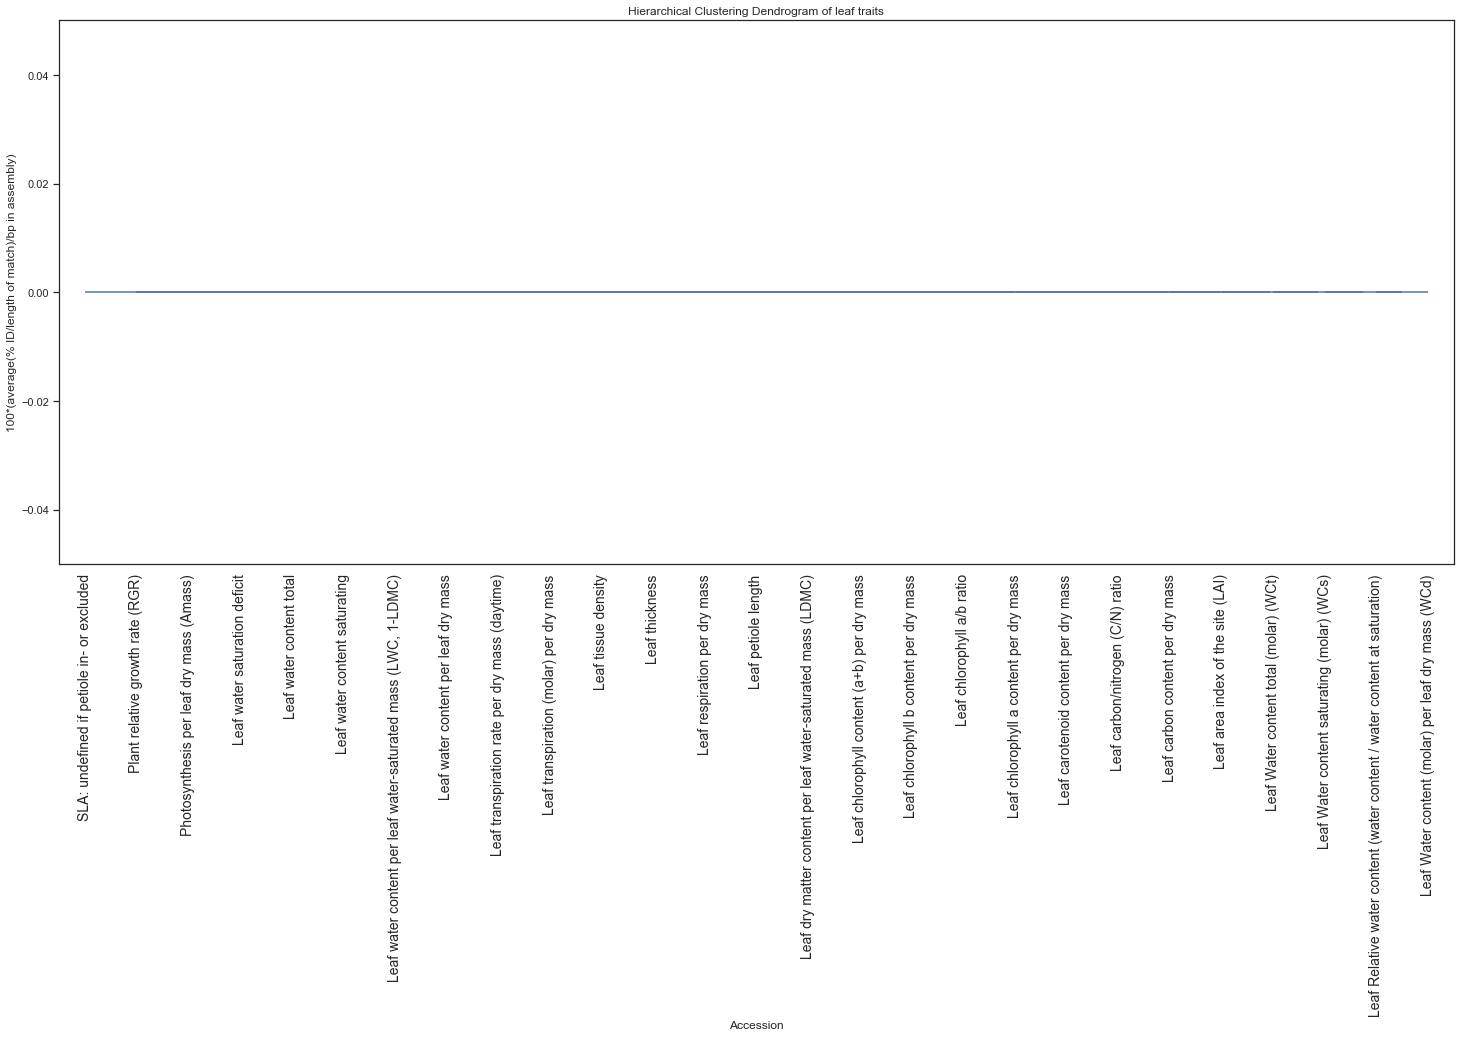

In [145]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of leaf traits')
plt.xlabel('Accession')
plt.ylabel('100*(average(% ID/length of match)/bp in assembly)')
dendrogram(
    Z,
    labels=(tr_leaf.index),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

### Picking biological question to address  

Possible:  

How do invasive species differ from archeophytes?    
Is the only difference between herbs and trees woodiness or is there more to it?  
What characteristics are typical of chalk plants? What group of plants are they most similar to?  
What features are associated with high photosynthetic capacity?  Which might be drivers and which results?  

### Clustering

### PCA